# Building Machine Learning Pipelines: Data Analysis Phase

## Project Name: House Prices: Advanced Regression Techniques

The main aim of this project is to predict the house price based on various features

## All the lifecycle in a data science projects

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

### Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# import the warnings module
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the CSV files
df_train = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/refs/heads/master/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/refs/heads/master/test.csv')

# Combine row-wise
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0


In [ ]:
# shape of the dataset
column, row = df.shape
print(f'The dataset has {column} columns and {row} rows')

The dataset has 2919 columns and 81 rows


In [ ]:
print(f'Id of houses {len(df.Id.unique())}')

Id of houses 2919


In [ ]:
# list of columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### In data analysis, we will analyze to find out the below stuff

1. Missing values
2. Numerical features
3. Distribution of the numerical features
4. Categorical features
5. Cardinality of categorical features
6. Outliers
7. Relationship between Independent and Dependent feature(SalePrice)

#### 1. Missing Values

In [ ]:
# step 1: make the list of features which has missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]
print(f'count of features with nan values - {len(features_with_na)}')
df[features_with_na].head()

count of features with nan values - 35


,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SalePrice
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,SBrkr,1.0,0.0,Gd,Typ,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD,208500.0
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,SBrkr,0.0,1.0,TA,Typ,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD,181500.0
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD,223500.0
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,SBrkr,1.0,0.0,Gd,Typ,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD,140000.0
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD,250000.0


In [ ]:
# check the percentage of nan values present in each features

# step 2: print the feature name and percentage of missing values
for feature in features_with_na:
  print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

MSZoning 0.0014 % missing values
LotFrontage 0.1665 % missing values
Alley 0.9322 % missing values
Utilities 0.0007 % missing values
Exterior1st 0.0003 % missing values
Exterior2nd 0.0003 % missing values
MasVnrType 0.605 % missing values
MasVnrArea 0.0079 % missing values
BsmtQual 0.0277 % missing values
BsmtCond 0.0281 % missing values
BsmtExposure 0.0281 % missing values
BsmtFinType1 0.0271 % missing values
BsmtFinSF1 0.0003 % missing values
BsmtFinType2 0.0274 % missing values
BsmtFinSF2 0.0003 % missing values
BsmtUnfSF 0.0003 % missing values
TotalBsmtSF 0.0003 % missing values
Electrical 0.0003 % missing values
BsmtFullBath 0.0007 % missing values
BsmtHalfBath 0.0007 % missing values
KitchenQual 0.0003 % missing values
Functional 0.0007 % missing values
FireplaceQu 0.4865 % missing values
GarageType 0.0538 % missing values
GarageYrBlt 0.0545 % missing values
GarageFinish 0.0545 % missing values
GarageCars 0.0003 % missing values
GarageArea 0.0003 % missing values
GarageQual 0.05

In [ ]:
# Calculate percentage of missing values
missing_percentages = {feature: np.round(df[feature].isnull().mean() * 100, 2) for feature in features_with_na}

# Sort features by percentage of missing values in descending order
sorted_missing = sorted(missing_percentages.items(), key=lambda x: x[1], reverse=True)
sorted_missing

[('PoolQC', 99.66),
 ('MiscFeature', 96.4),
 ('Alley', 93.22),
 ('Fence', 80.44),
 ('MasVnrType', 60.5),
 ('SalePrice', 49.98),
 ('FireplaceQu', 48.65),
 ('LotFrontage', 16.65),
 ('GarageYrBlt', 5.45),
 ('GarageFinish', 5.45),
 ('GarageQual', 5.45),
 ('GarageCond', 5.45),
 ('GarageType', 5.38),
 ('BsmtCond', 2.81),
 ('BsmtExposure', 2.81),
 ('BsmtQual', 2.77),
 ('BsmtFinType2', 2.74),
 ('BsmtFinType1', 2.71),
 ('MasVnrArea', 0.79),
 ('MSZoning', 0.14),
 ('Utilities', 0.07),
 ('BsmtFullBath', 0.07),
 ('BsmtHalfBath', 0.07),
 ('Functional', 0.07),
 ('Exterior1st', 0.03),
 ('Exterior2nd', 0.03),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.03),
 ('BsmtUnfSF', 0.03),
 ('TotalBsmtSF', 0.03),
 ('Electrical', 0.03),
 ('KitchenQual', 0.03),
 ('GarageCars', 0.03),
 ('GarageArea', 0.03),
 ('SaleType', 0.03)]

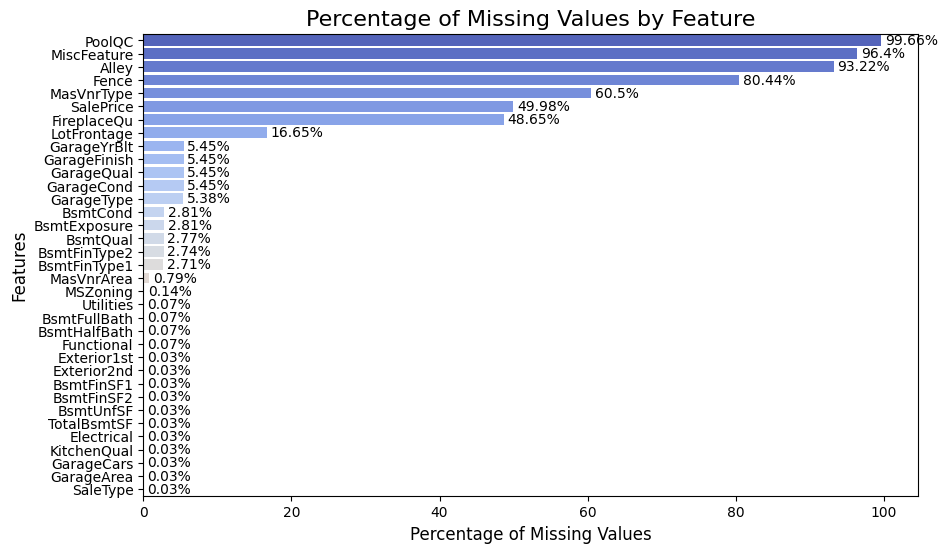

In [ ]:
# Calculate percentage of missing values
missing_percentages = {feature: np.round(df[feature].isnull().mean() * 100, 2) for feature in features_with_na}

# Sort features by percentage of missing values in descending order
sorted_missing = sorted(missing_percentages.items(), key=lambda x: x[1], reverse=True)
# sorted_missing

features_sorted = [item[0] for item in sorted_missing]
# features_sorted

percentages_sorted = [item[1] for item in sorted_missing]
# percentages_sorted

# Plot horizontal bar chart with sorted values and data labels
plt.figure(figsize=(10, 6))
sns.barplot(x=percentages_sorted, y=features_sorted, palette='coolwarm', orient='h')

# Add labels for data values
for index, value in enumerate(percentages_sorted):
    plt.text(value + 0.5, index, f'{value}%', va='center', fontsize=10)

plt.title('Percentage of Missing Values by Feature', fontsize=16)
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()


Since there are many missing values, we need to find the realationship between missing values and SalePrice

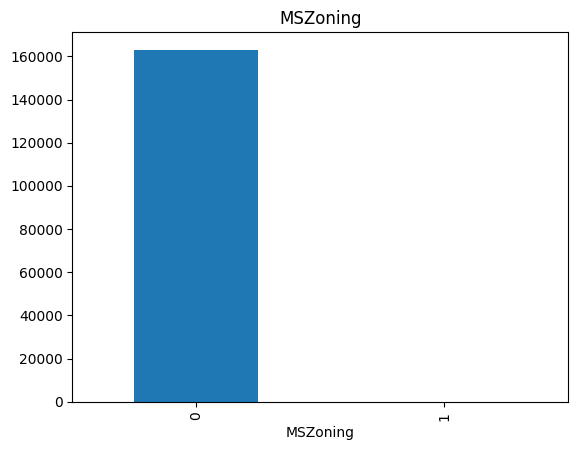

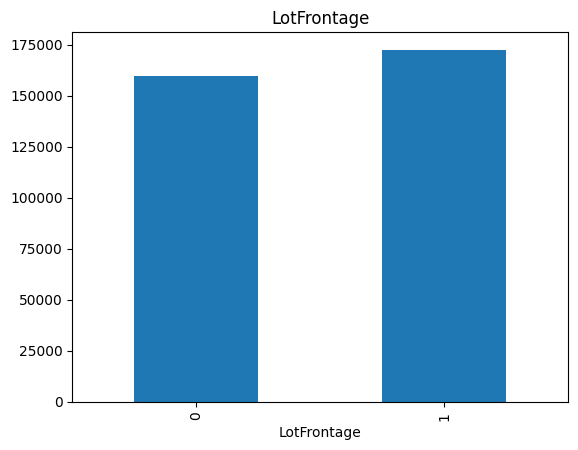

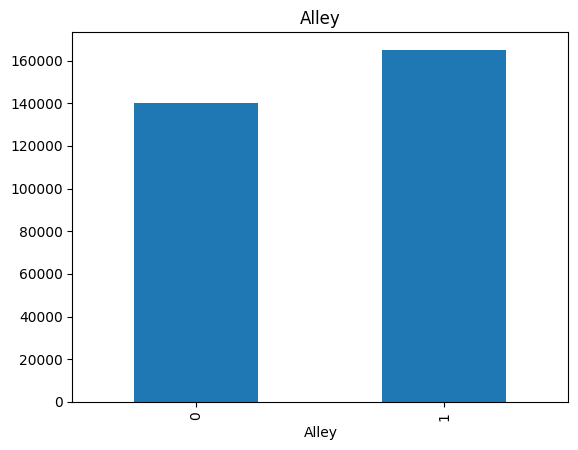

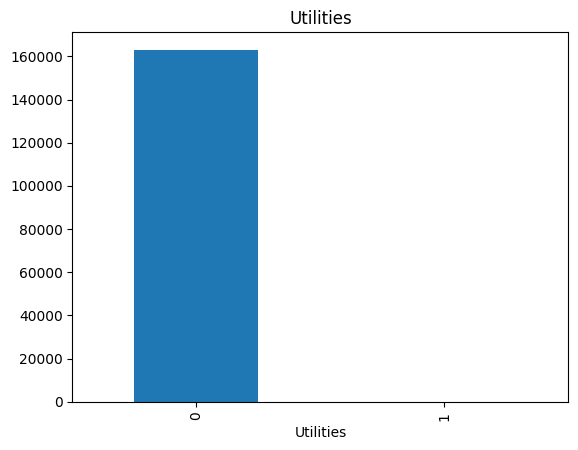

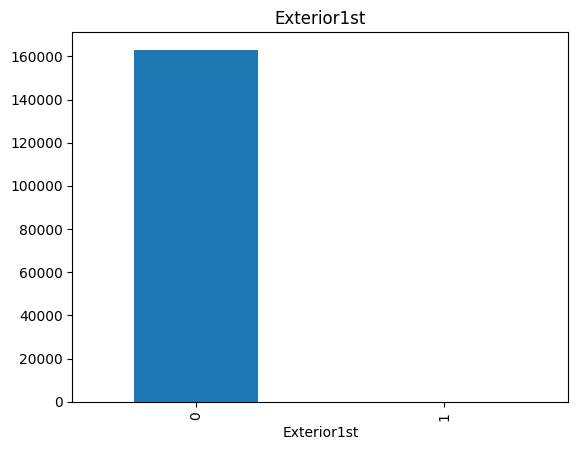

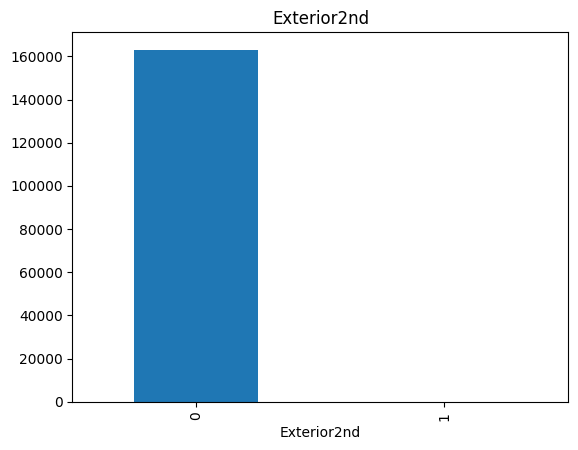

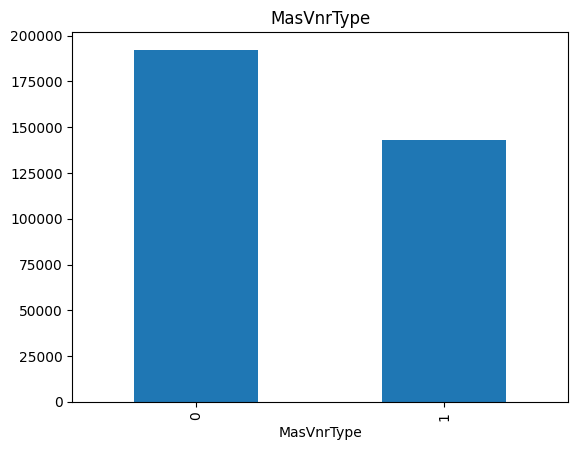

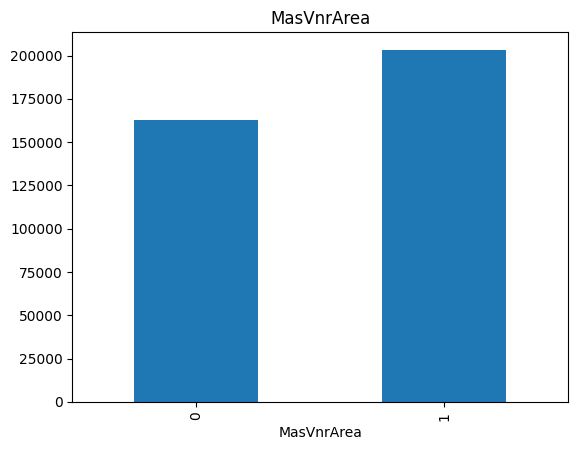

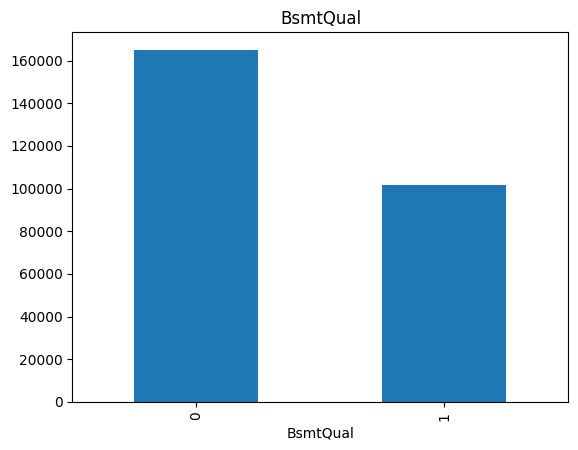

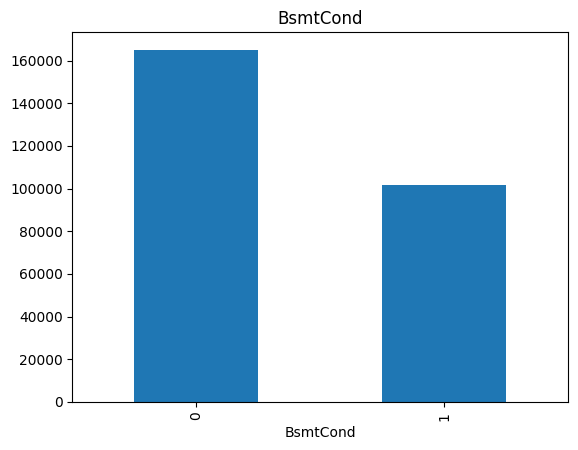

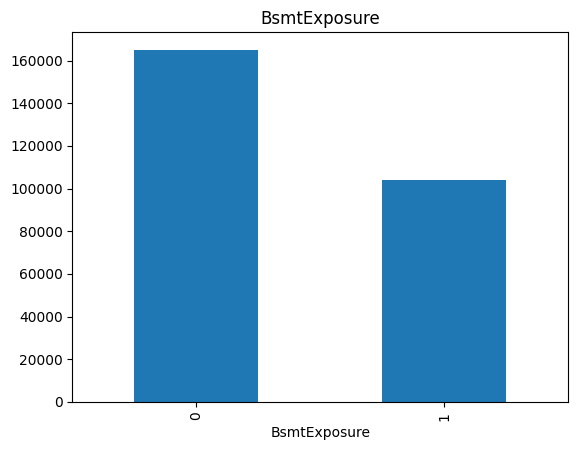

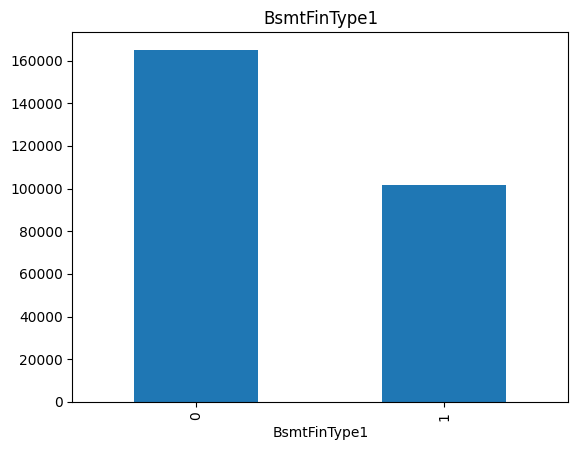

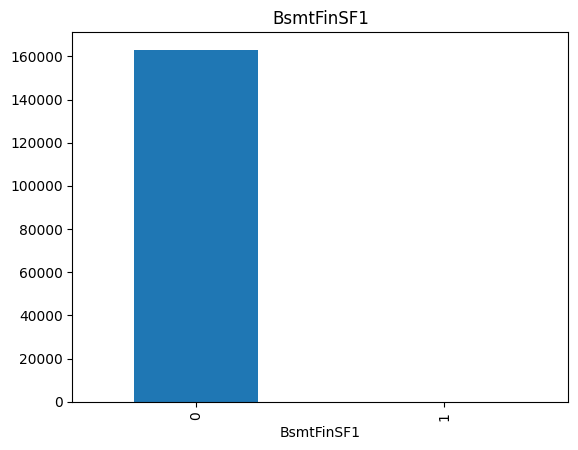

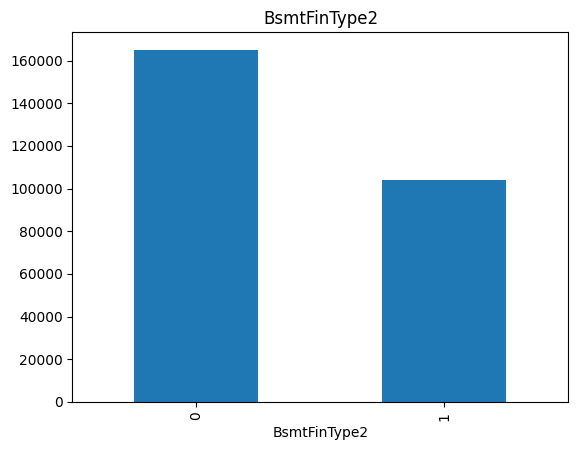

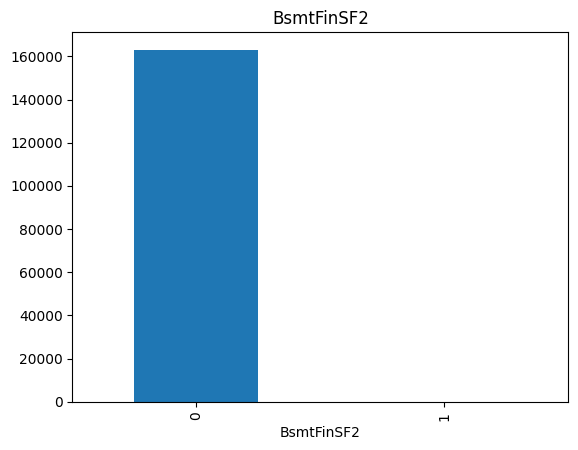

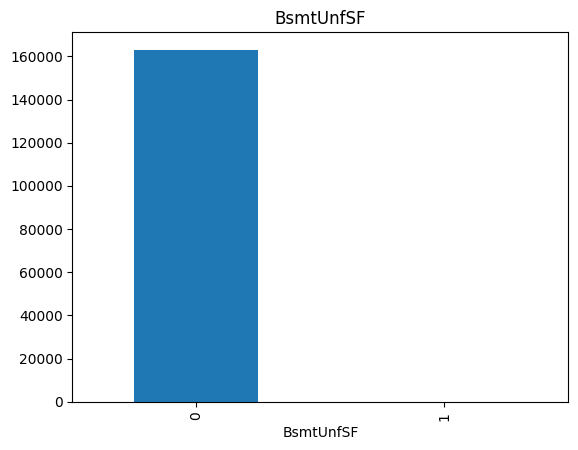

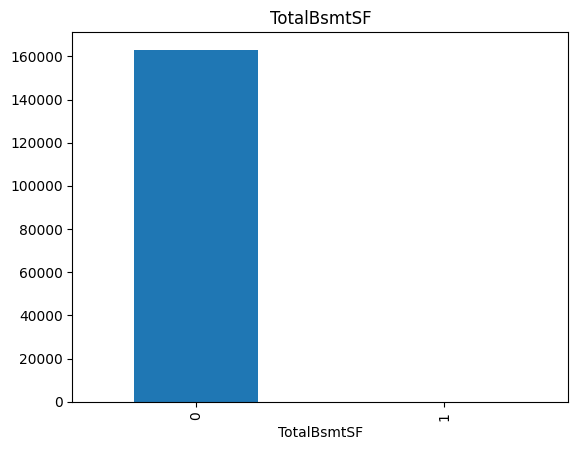

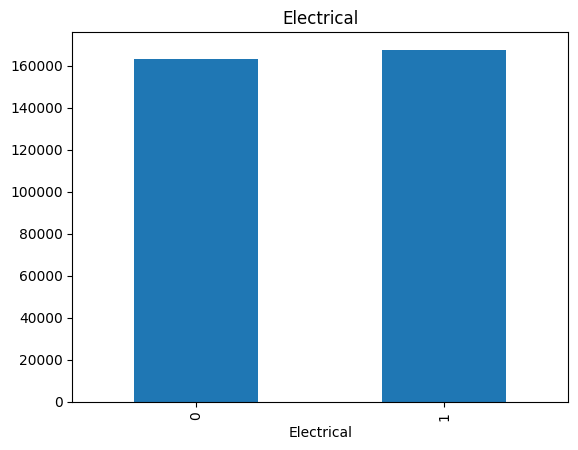

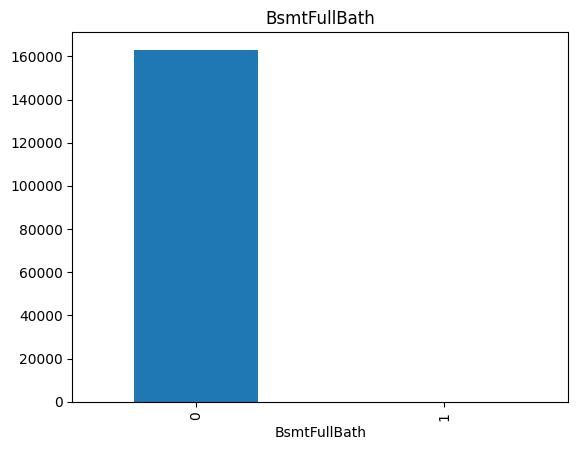

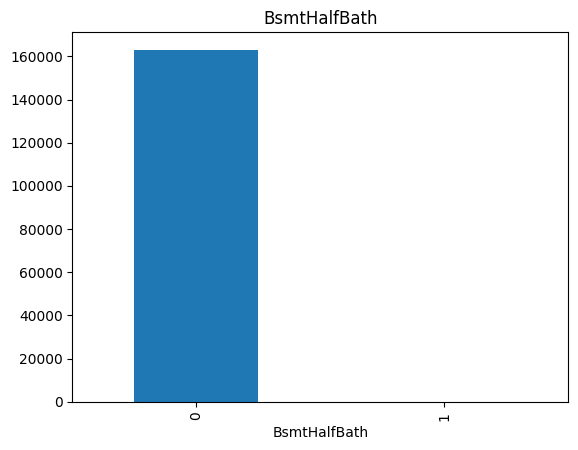

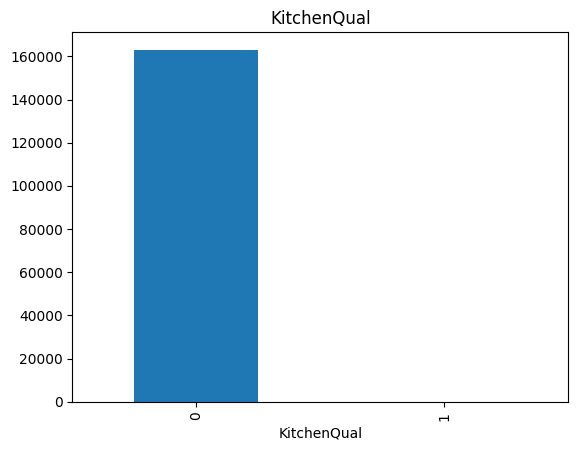

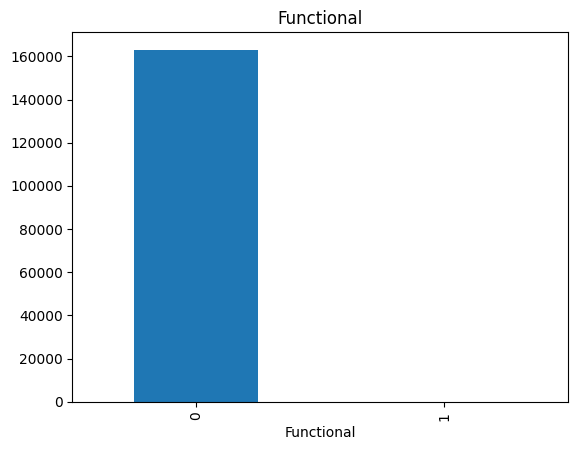

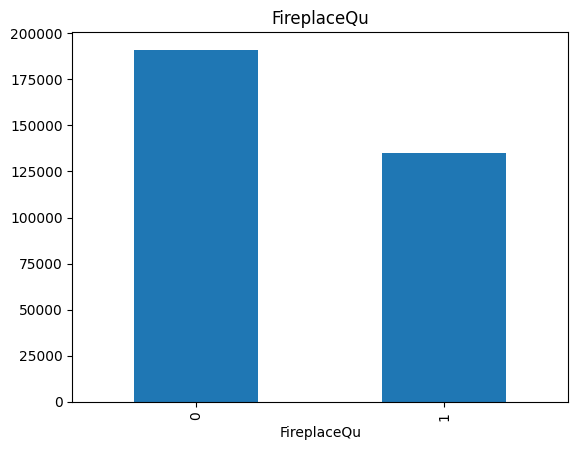

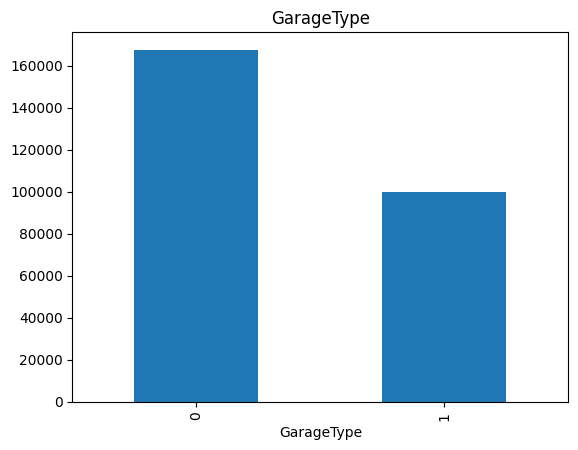

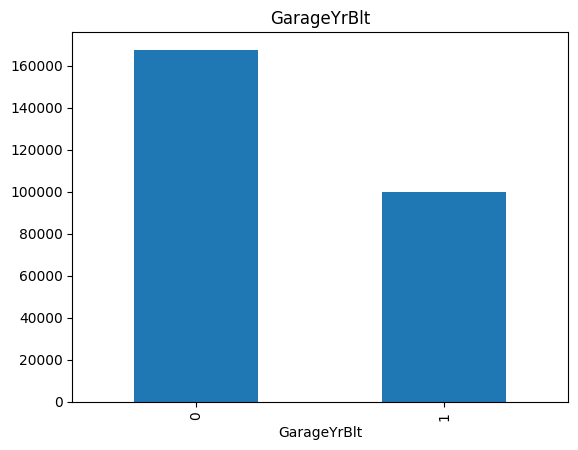

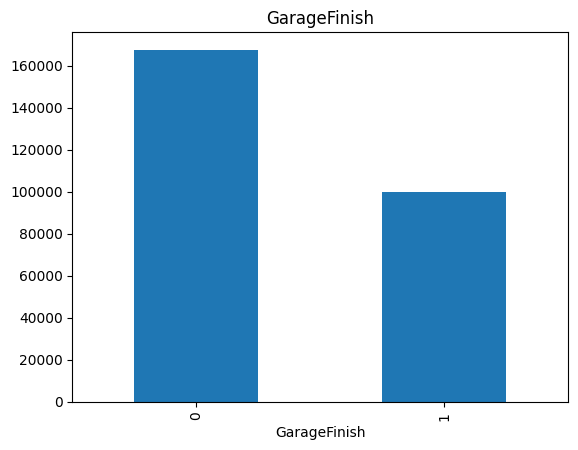

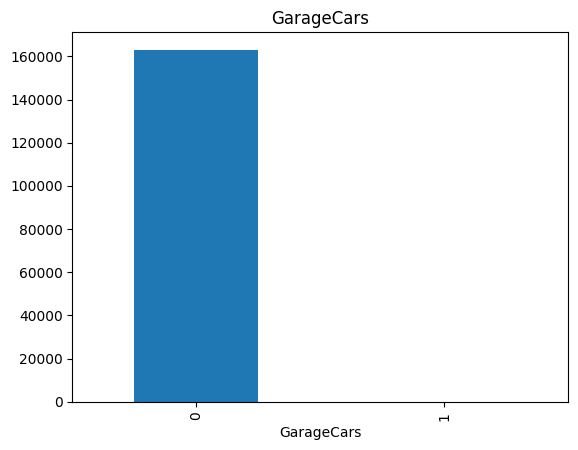

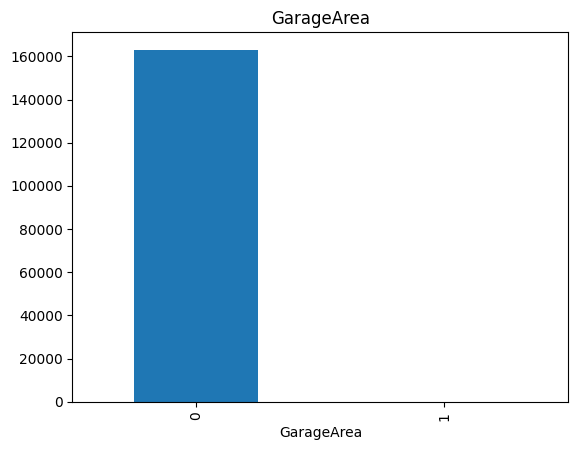

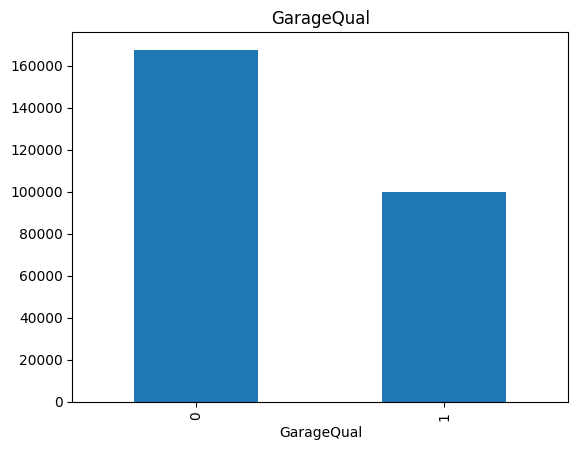

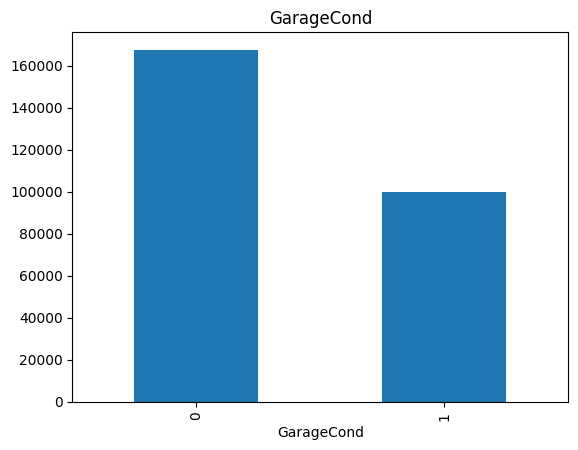

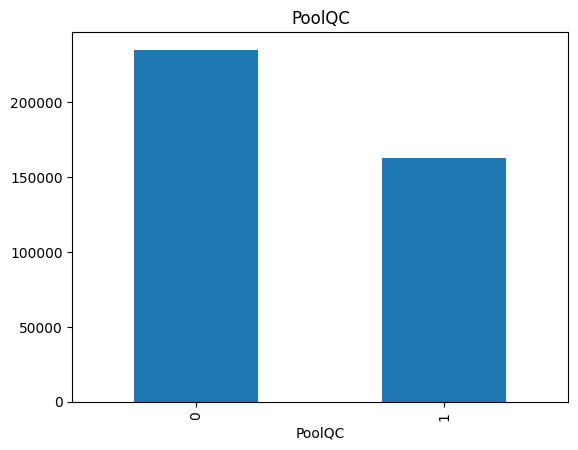

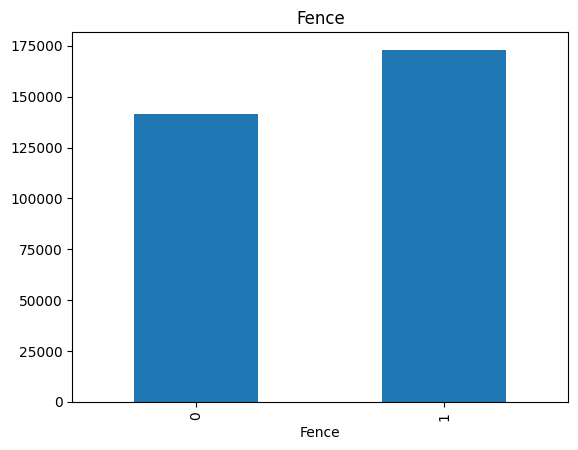

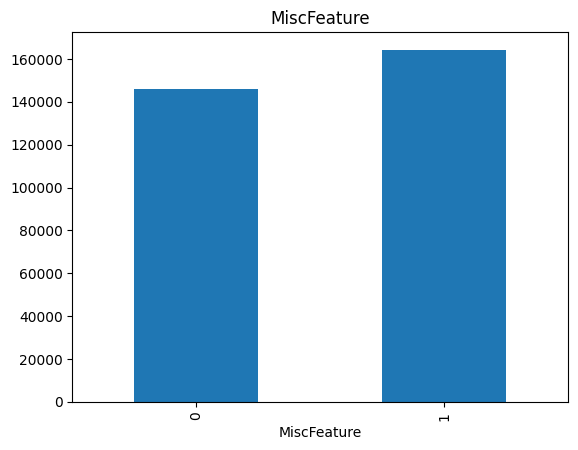

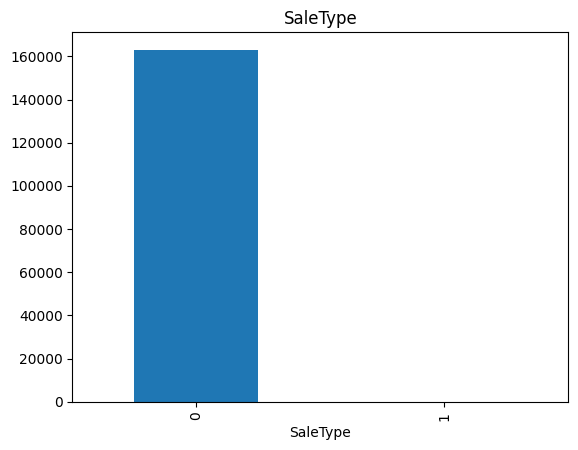

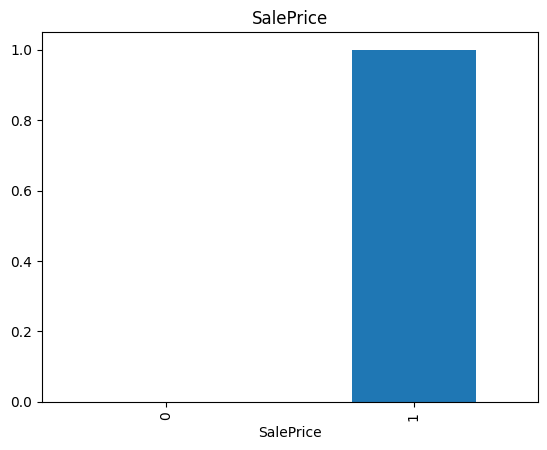

In [ ]:
for feature in features_with_na:
    data = df.copy()

    # make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here, with the relation between the missing values and the dependent variable is clearly visible. So, we need to replace these nan values with something meaningful

#### 2. Numerical features

In [ ]:
# make the list of features which has missing values
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(f'count of numerical features - {len(numerical_features)}')
df[numerical_features].head()

count of numerical features - 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


##### Temporal Variables(eg. DateTime avriable)

In [ ]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

From the dataset, we have 4 year variables. We have extract information from the datetime variables like no. of years or no. of days.

One example in this specific scenario, can be difference in years between the year, the house was build and the year, the house was sold.

In [ ]:
# content of these year variables
for feature in year_feature:
  print(feature, df[feature].unique(), '\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905
 1907 1896 1902 1895 1879 1901] 

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1

Check whether there is a realation between built year of the house and SalePrice

Text(0.5, 1.0, 'House Price vs YearSold')

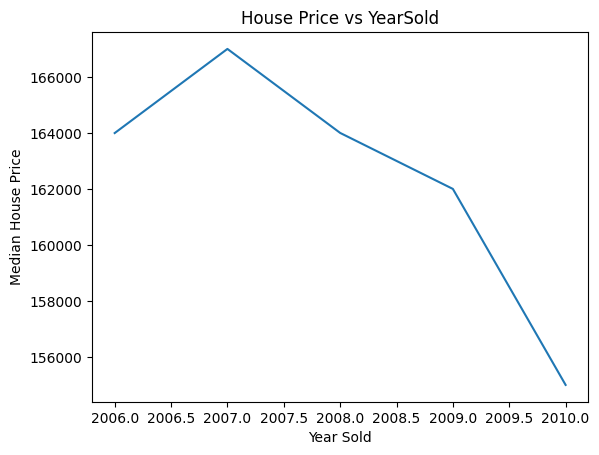

In [ ]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

here, we will compare the difference between all of the year features with SalePrice

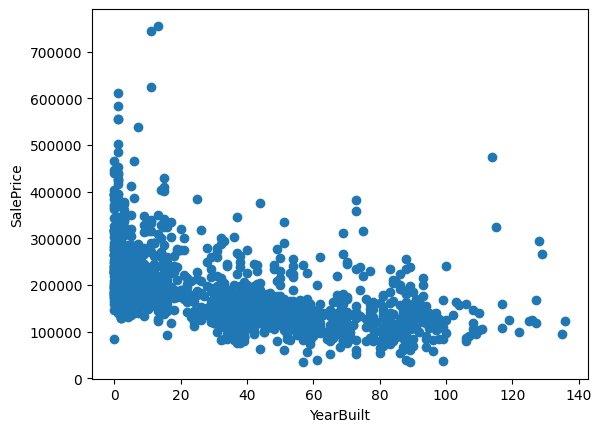

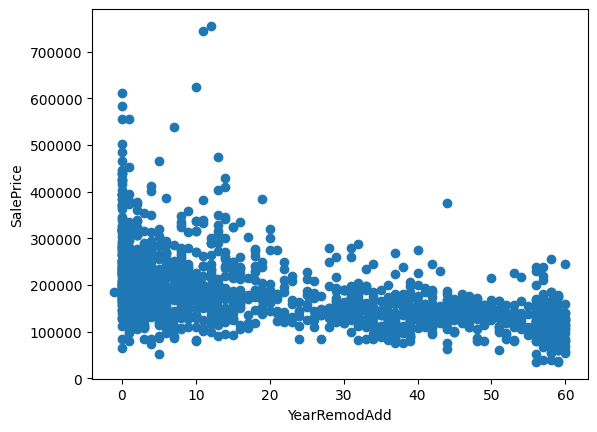

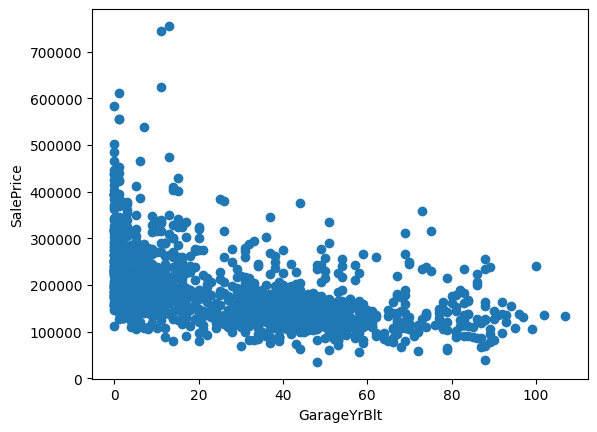

In [ ]:
for feature in year_feature:
  if feature != 'YrSold':
    data = df.copy()

    # capture the difference between year variable and the year, the house was sold for
    data[feature] = data['YrSold'] - data[feature]

    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

#### 3. Distribution of the numerical features

Numerical Variables are usually of 2 types,

i. Continuous

ii. Discrete


##### i. Discrete

In [ ]:
[feature for feature in numerical_features if len(df[feature].unique())< 25 ]

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [ ]:
[feature for feature in numerical_features if feature in year_feature+['Id']]

['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
[feature for feature in numerical_features if len(df[feature].unique())< 25 and feature not in year_feature+['Id']]

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [ ]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())< 25 and feature not in year_feature+['Id']]
print(f'Count of discrete features - {len(discrete_feature)}')
df[discrete_feature].head()

Count of discrete features - 14


,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1.0,0.0,2,1,3,1,8,0,2.0,0,2
1,20,6,8,0.0,1.0,2,0,3,1,6,1,2.0,0,5
2,60,7,5,1.0,0.0,2,1,3,1,6,1,2.0,0,9
3,70,7,5,1.0,0.0,1,0,3,1,7,1,3.0,0,2
4,60,8,5,1.0,0.0,2,1,4,1,9,1,3.0,0,12


Find the relationship between discrete features and SalePrice

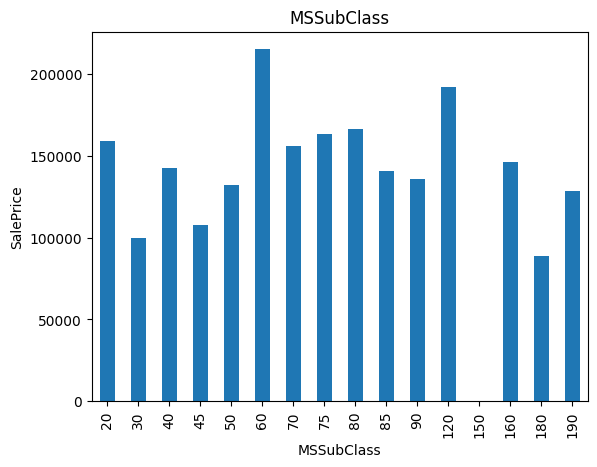

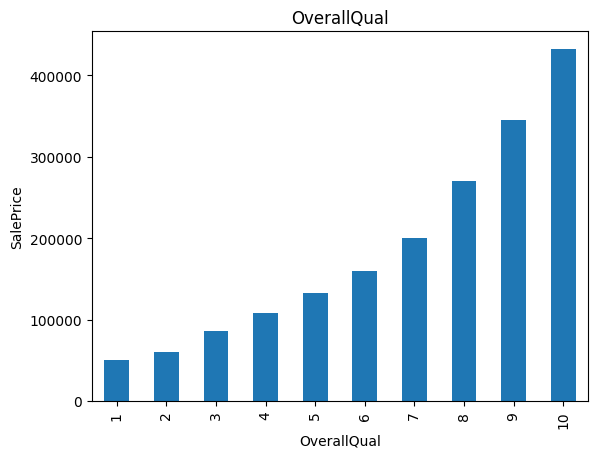

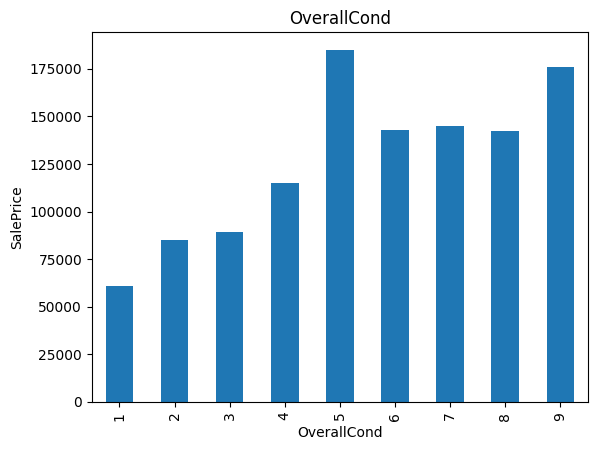

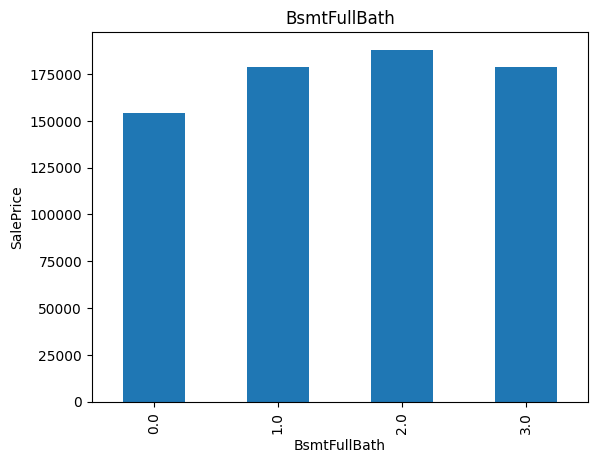

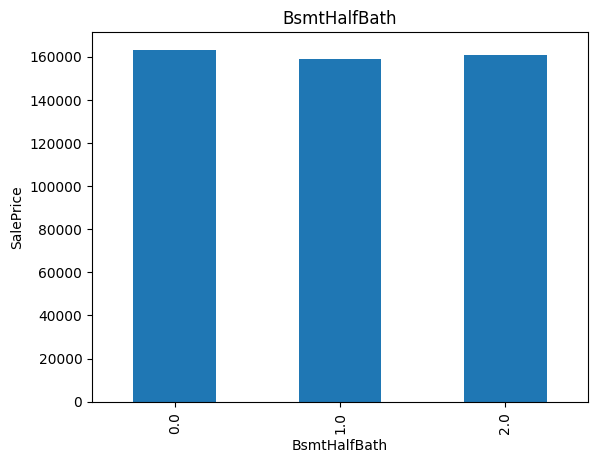

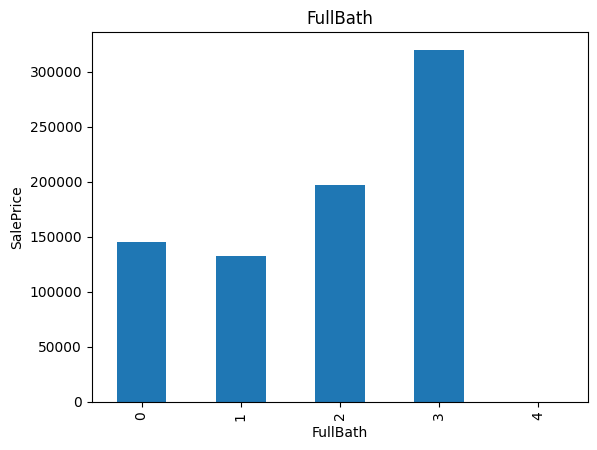

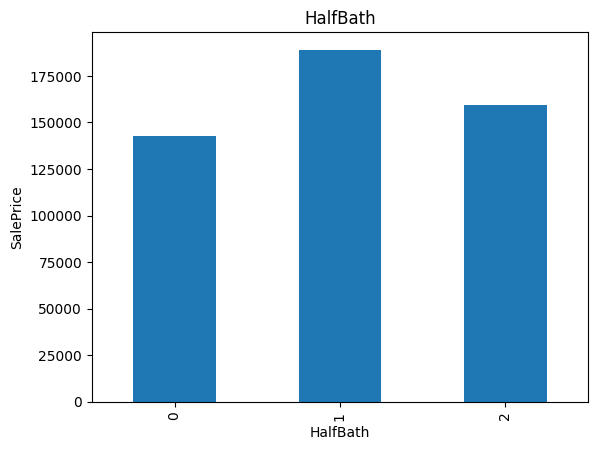

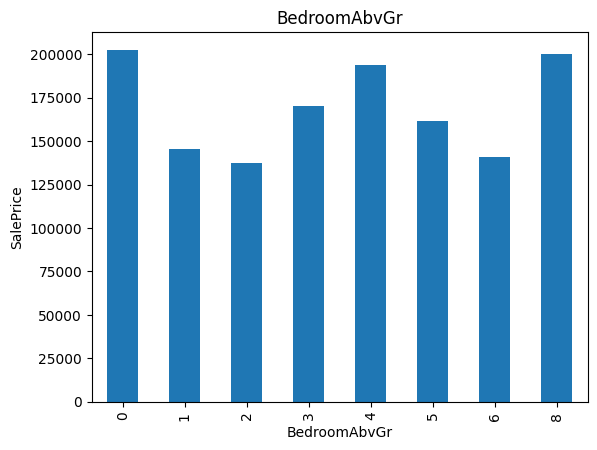

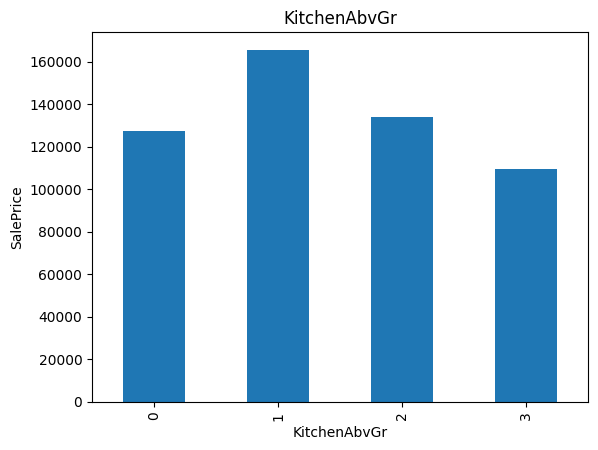

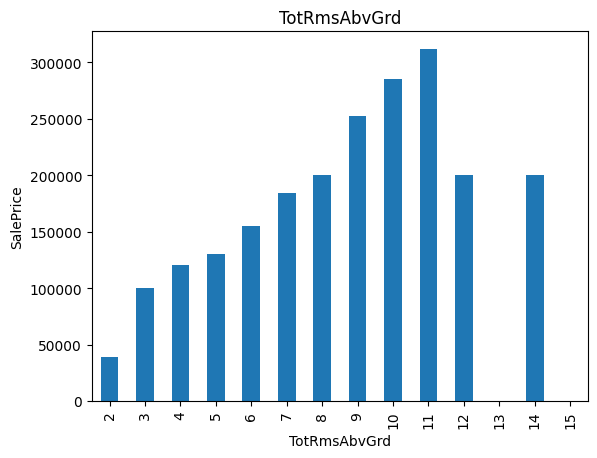

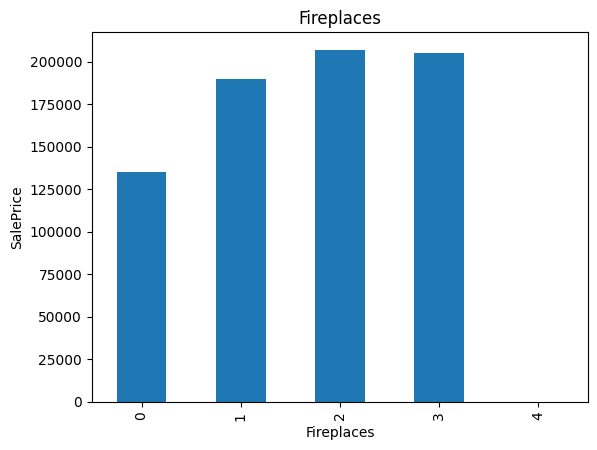

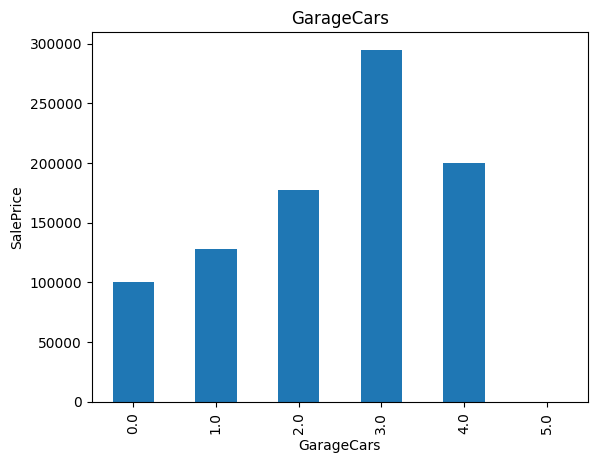

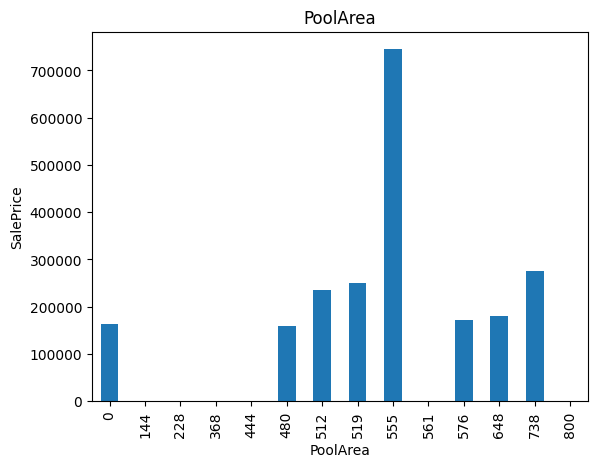

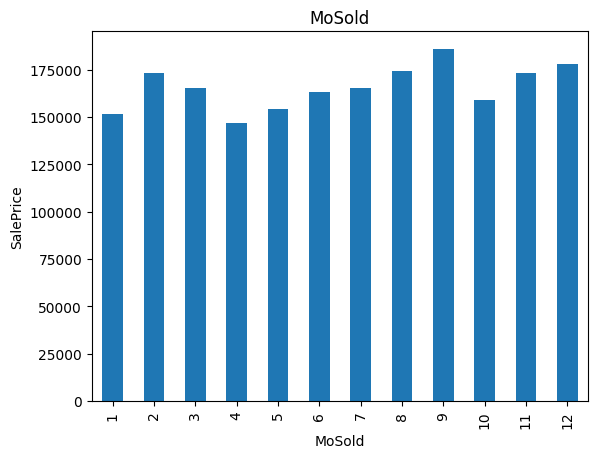

In [ ]:
for feature in discrete_feature:
  data = df.copy()

  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

So, there are relation for some discrete features and SalePrice

##### ii. Continuous

In [ ]:
print([feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Id']])

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


In [ ]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Id']]
print(f'Continuous feature count - {len(continuous_feature)}')
df[continuous_feature].head()

Continuous feature count - 19


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0,208500.0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0,181500.0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0,223500.0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0,140000.0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0,250000.0


analyze the continuous values by creating histogram to understand the distribution

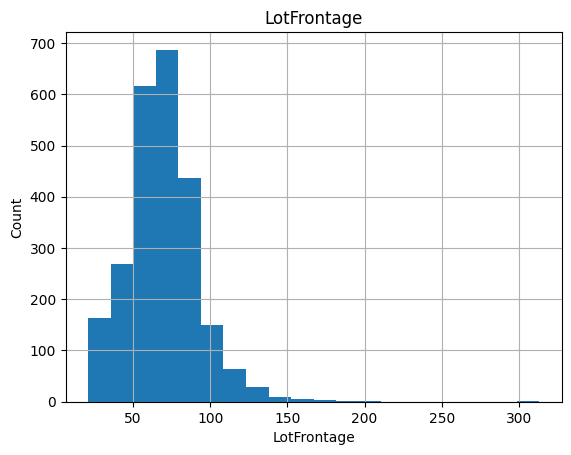

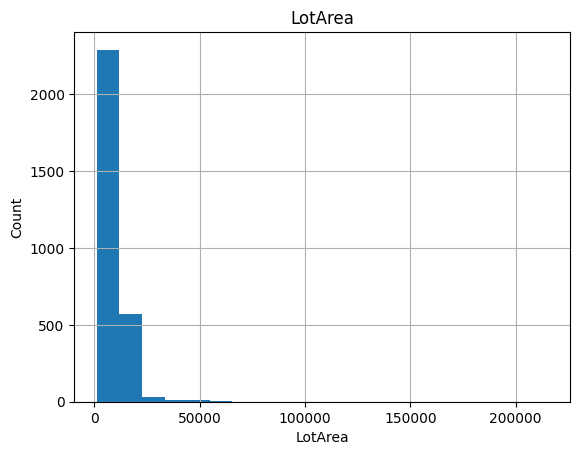

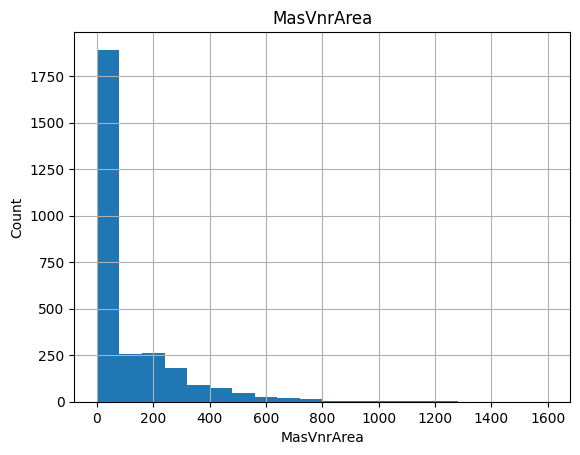

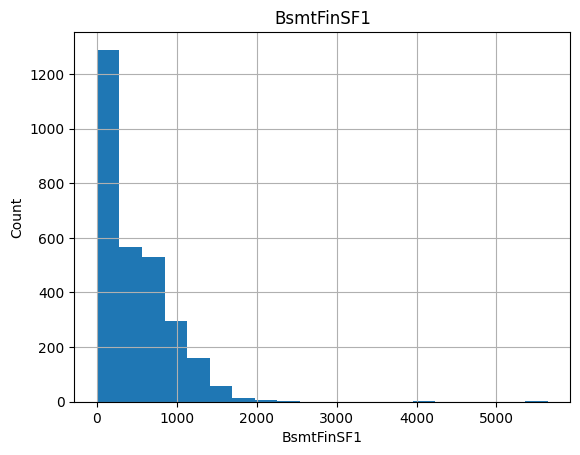

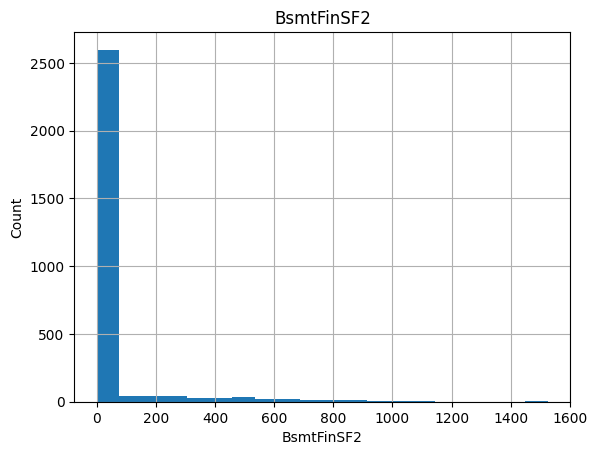

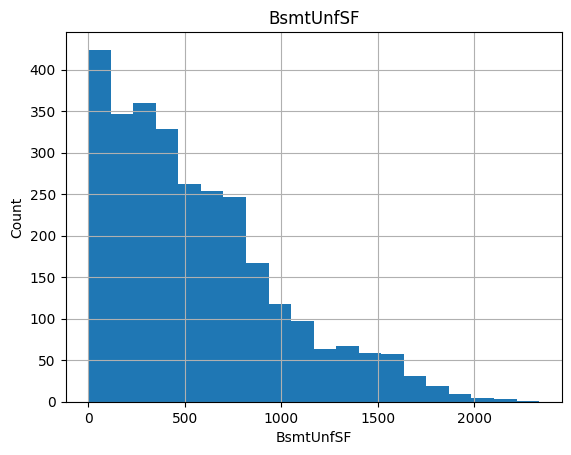

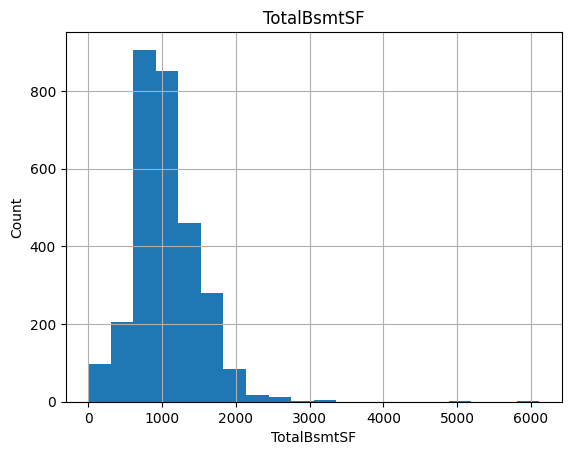

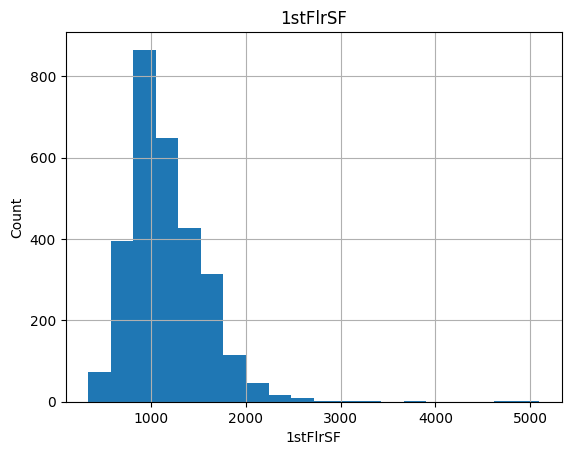

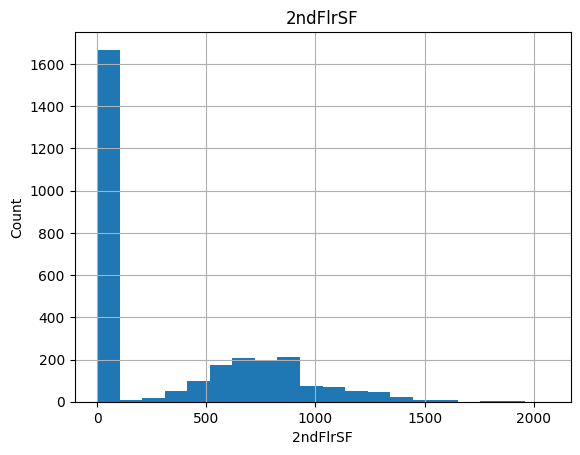

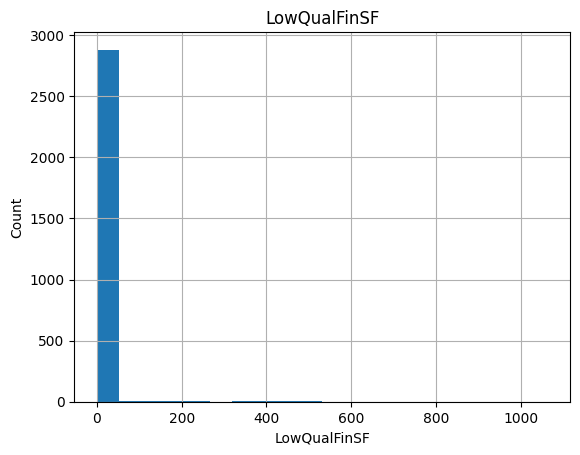

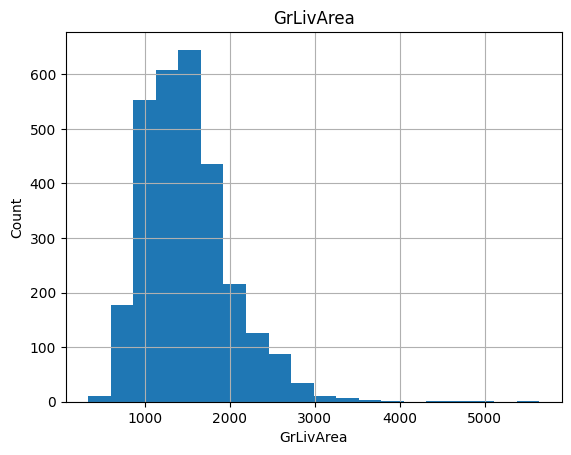

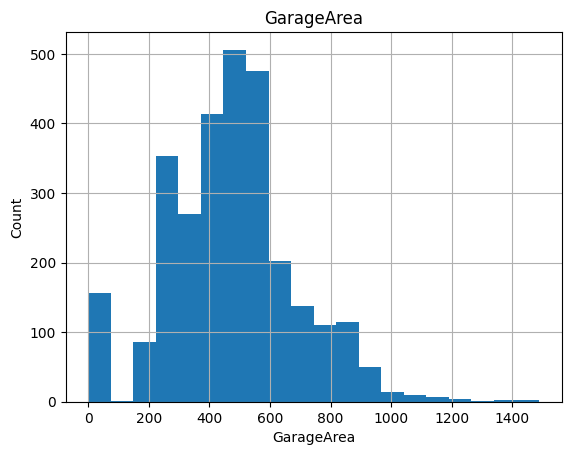

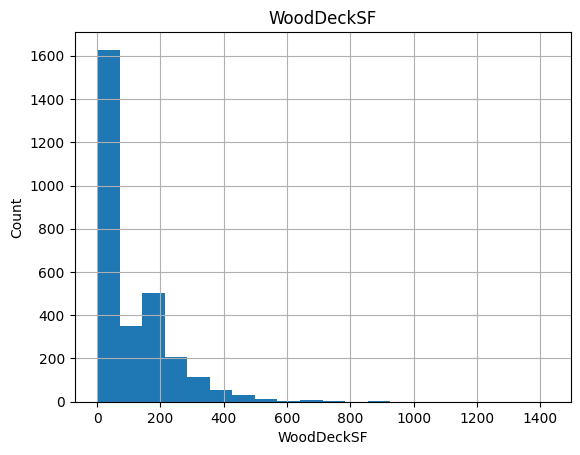

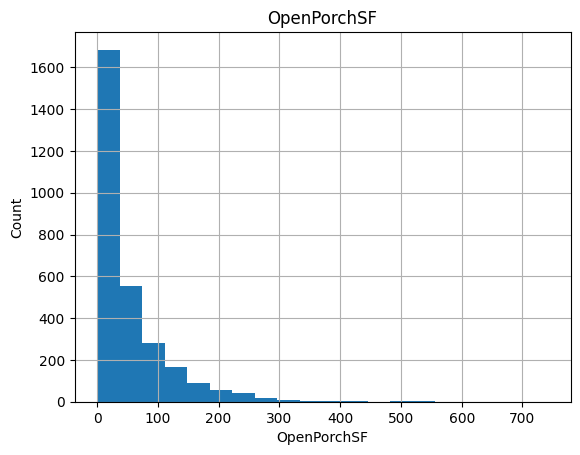

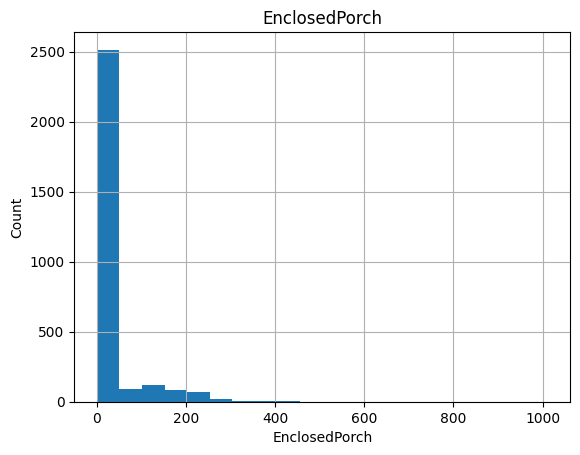

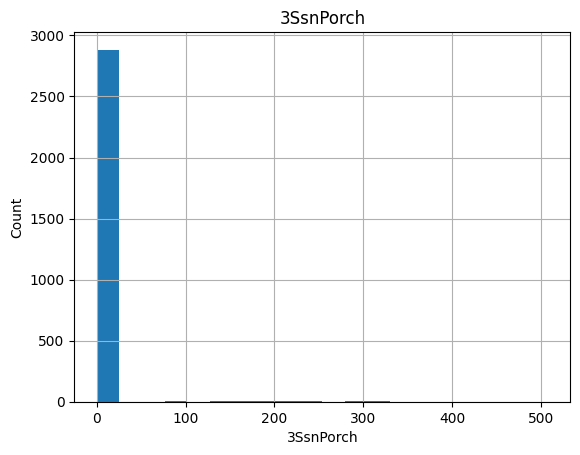

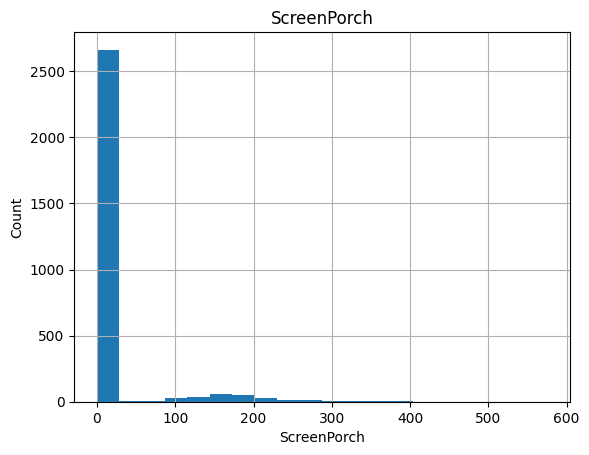

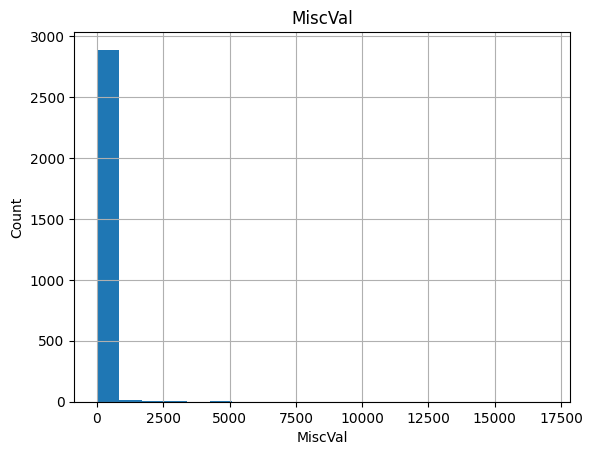

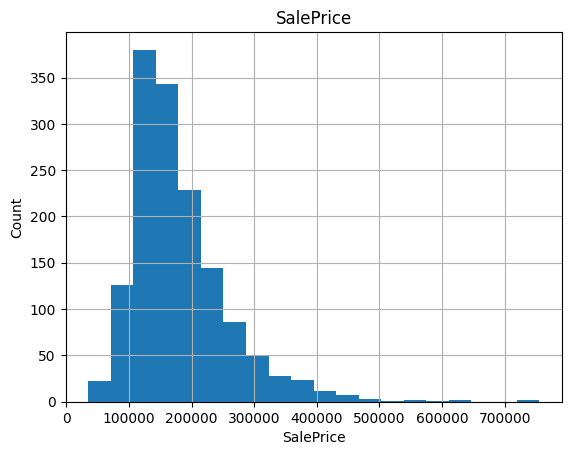

In [ ]:
for feature in continuous_feature:
  data = df.copy()

  data[feature].hist(bins=20)
  plt.xlabel(feature)
  plt.ylabel('Count')

  plt.title(feature)
  plt.show()

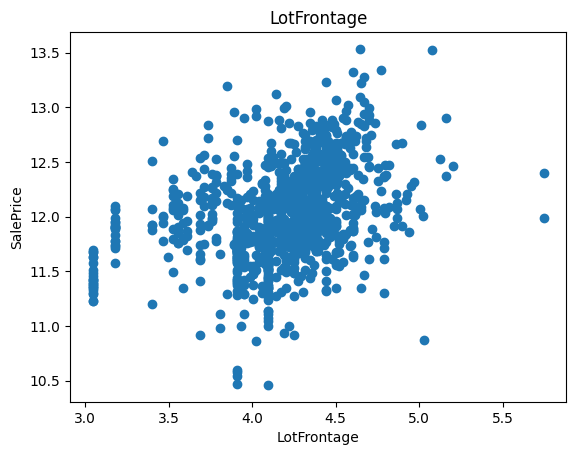

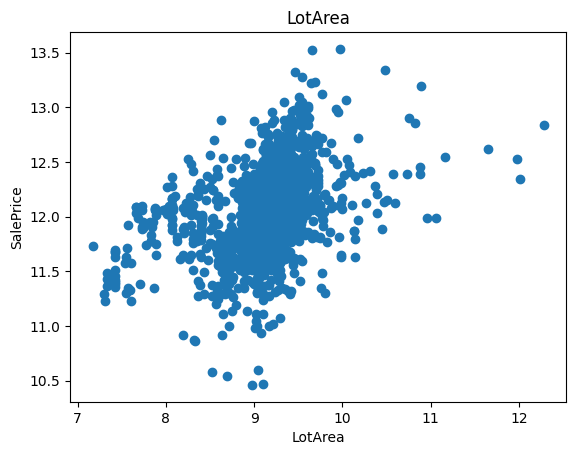

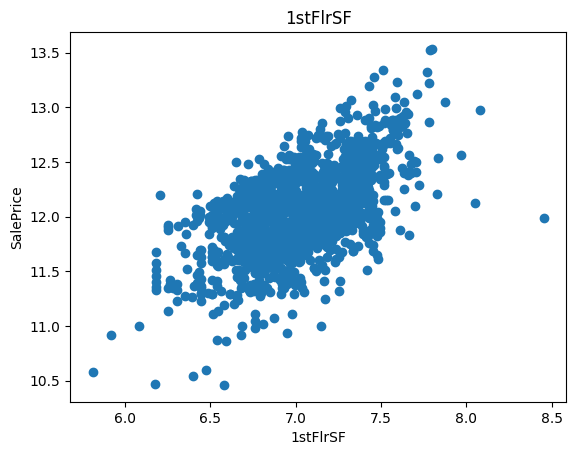

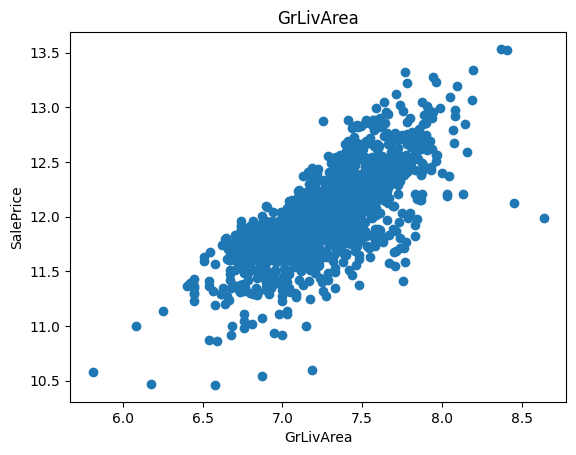

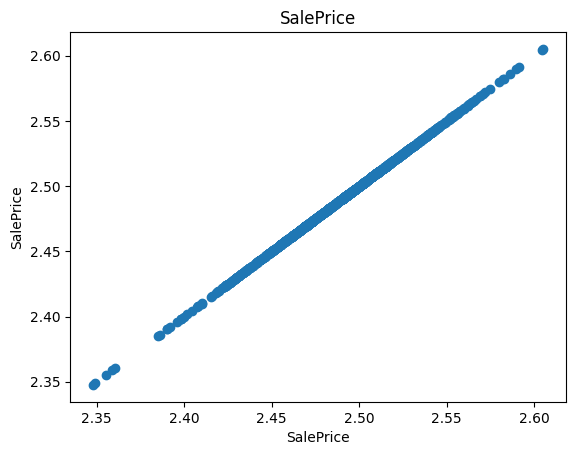

In [ ]:
# we will be using logarithmic transformation

for feature in continuous_feature:
  data = df.copy()

  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice'])

    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### 4. Categorical features

In [ ]:
[feature for feature in df.columns if df[feature].dtypes == 'O']

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(f'Count of categorical features - {len(categorical_features)}')
df[categorical_features].head()

Count of categorical features - 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
for feature in categorical_features:
  print(f'The feature {"feature"} and number of categories - {len(df[feature].unique())}')

The feature feature and number of categories - 6
The feature feature and number of categories - 2
The feature feature and number of categories - 3
The feature feature and number of categories - 4
The feature feature and number of categories - 4
The feature feature and number of categories - 3
The feature feature and number of categories - 5
The feature feature and number of categories - 3
The feature feature and number of categories - 25
The feature feature and number of categories - 9
The feature feature and number of categories - 8
The feature feature and number of categories - 5
The feature feature and number of categories - 8
The feature feature and number of categories - 6
The feature feature and number of categories - 8
The feature feature and number of categories - 16
The feature feature and number of categories - 17
The feature feature and number of categories - 4
The feature feature and number of categories - 4
The feature feature and number of categories - 5
The feature featu

7. Find out the reltionship between categorical variable and SalePrice

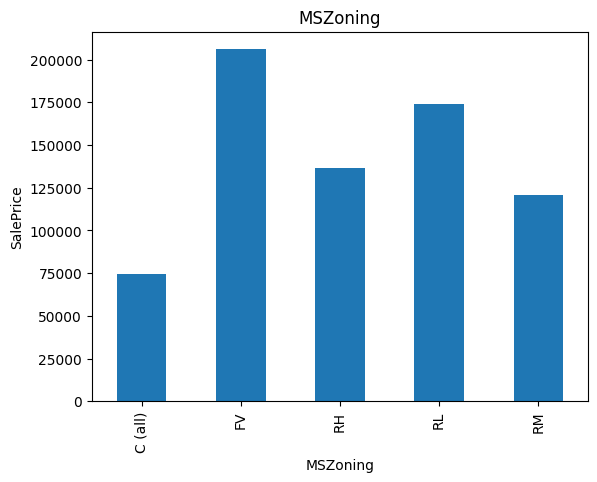

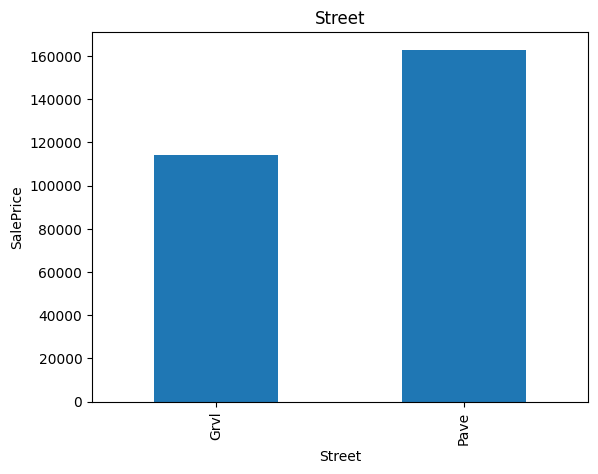

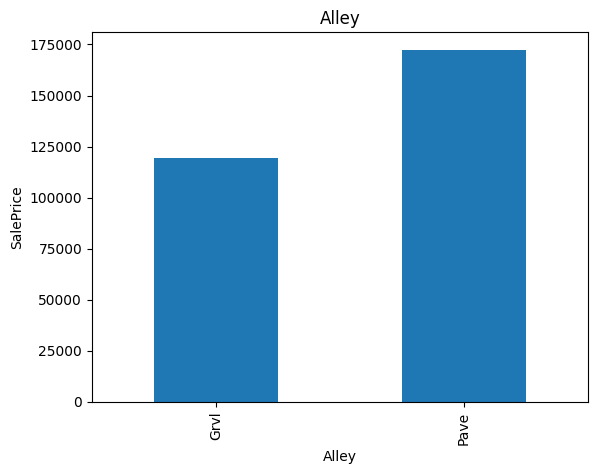

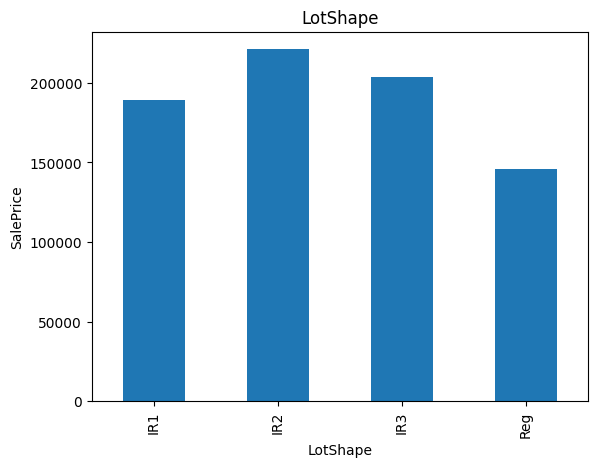

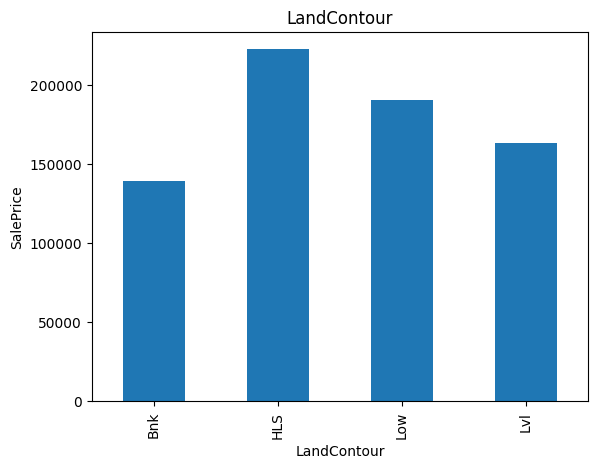

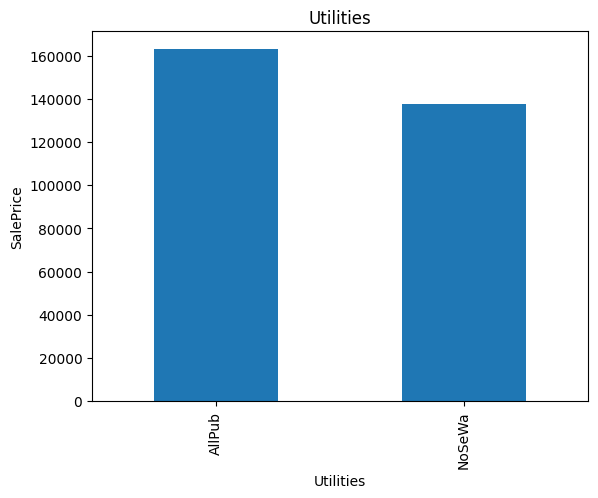

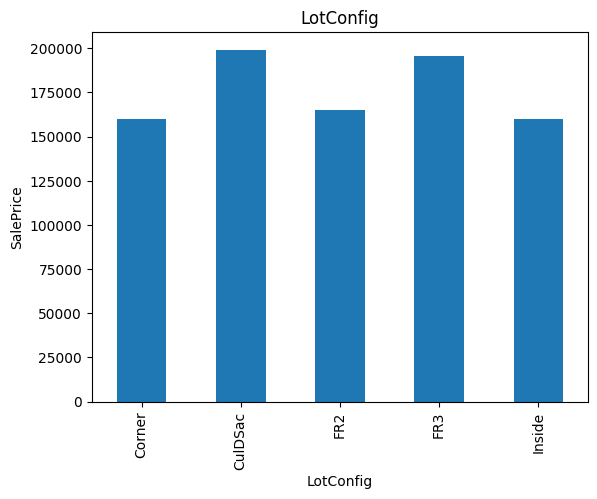

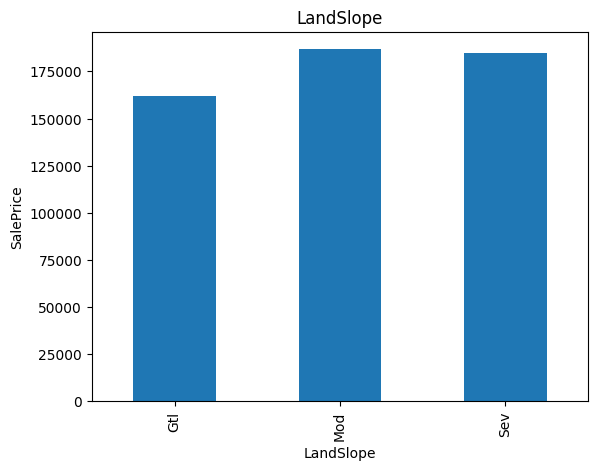

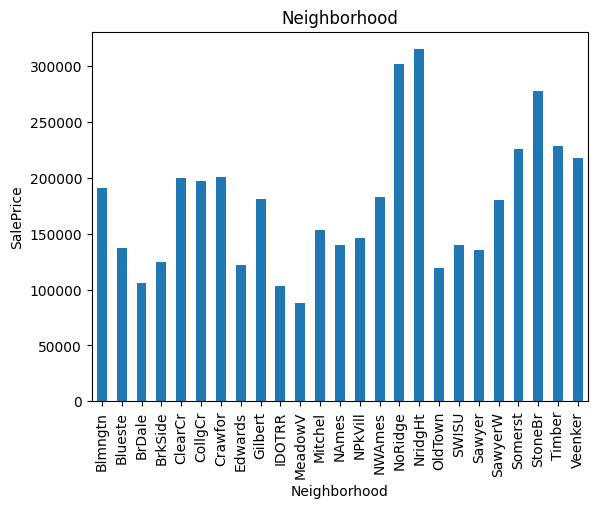

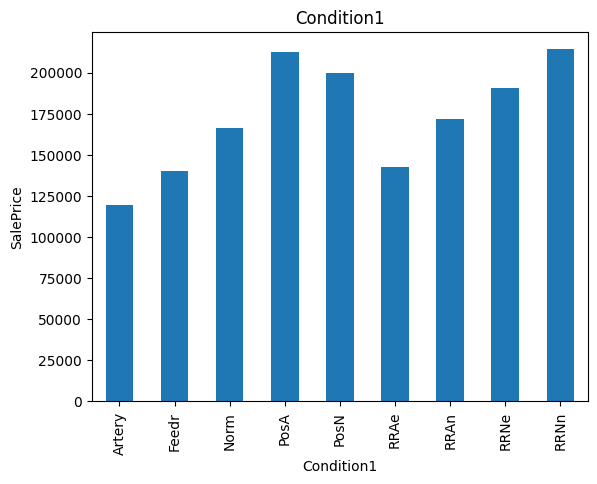

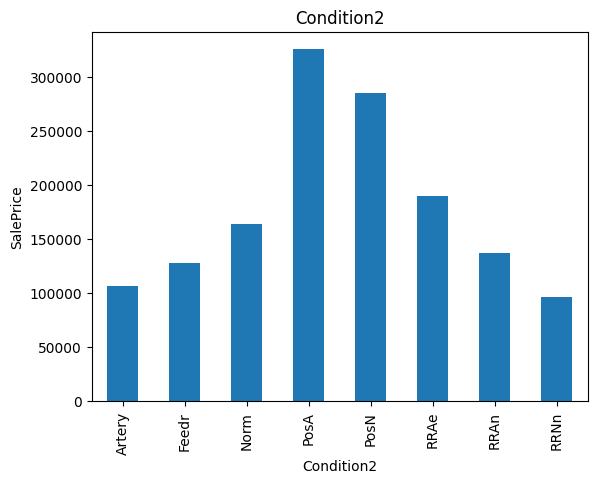

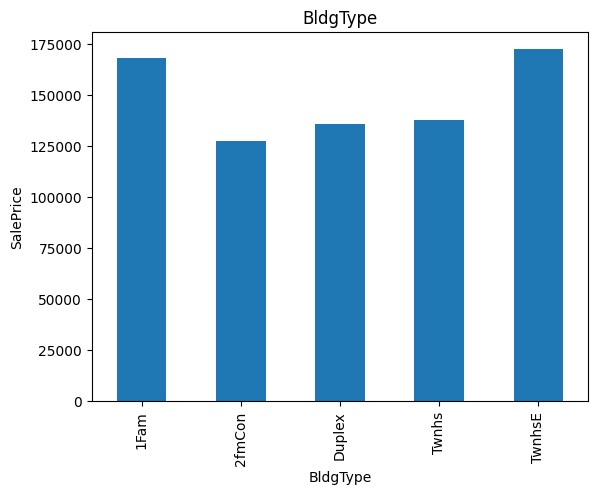

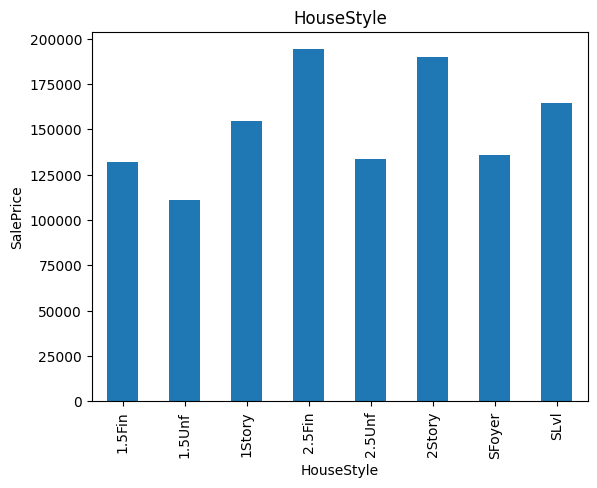

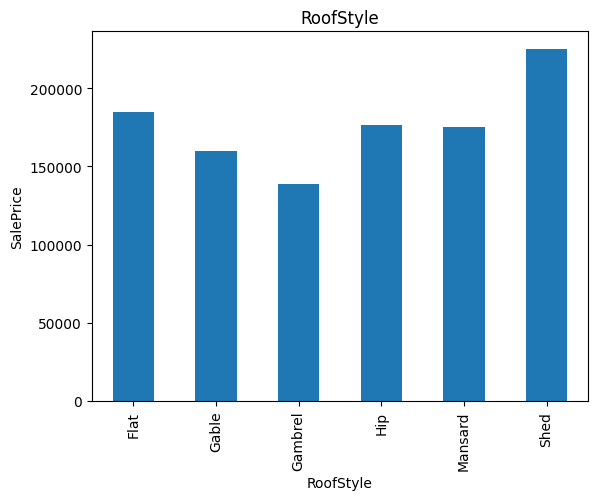

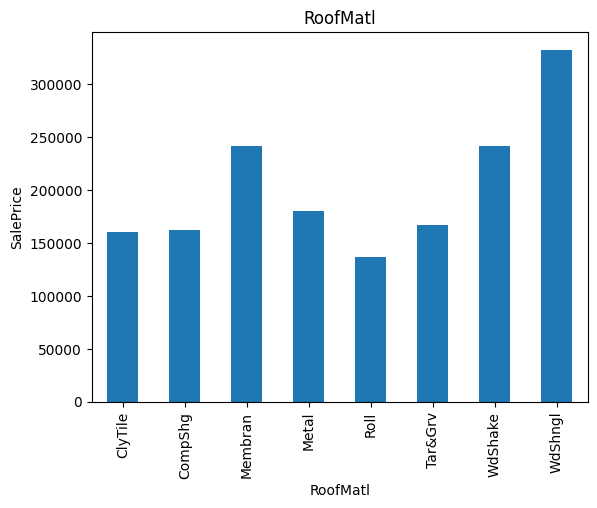

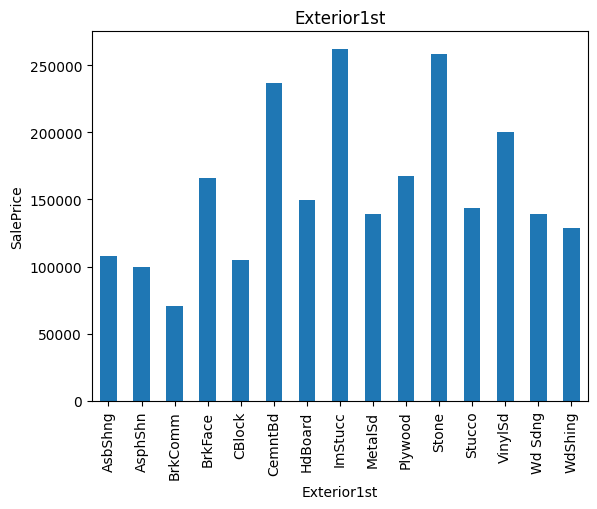

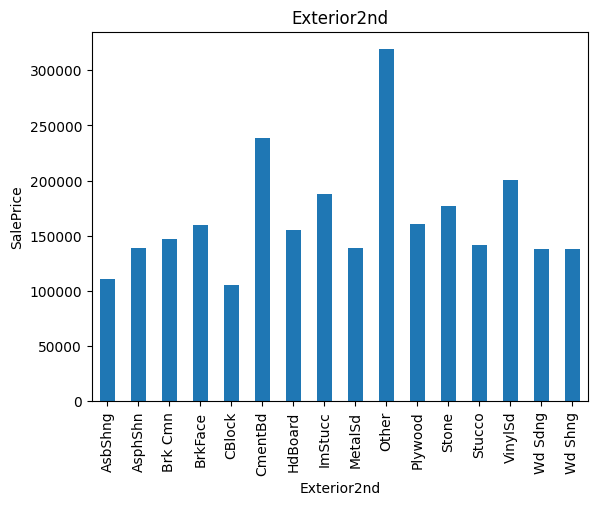

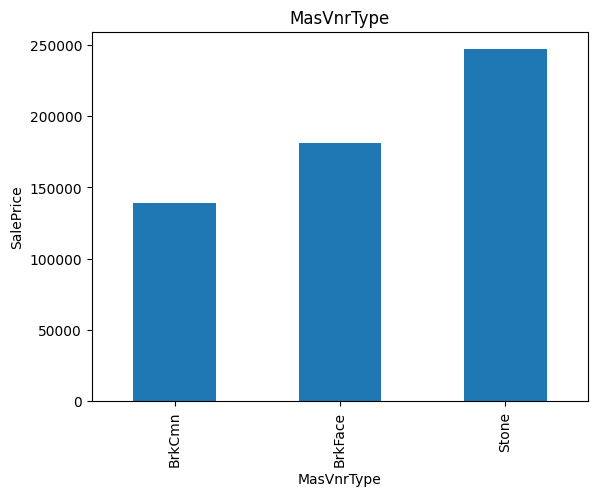

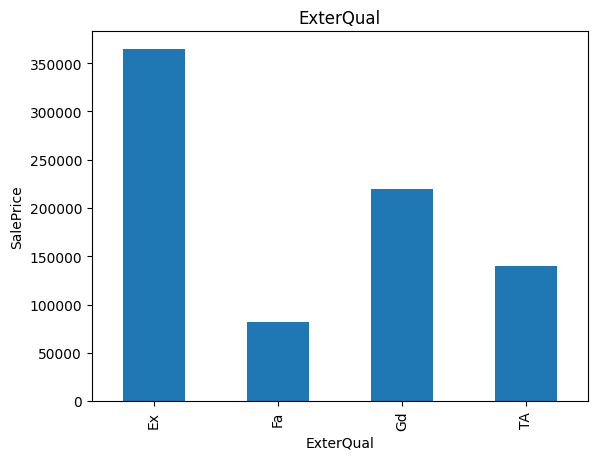

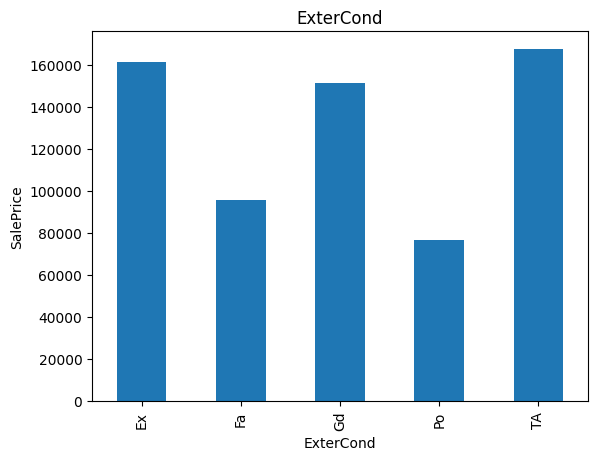

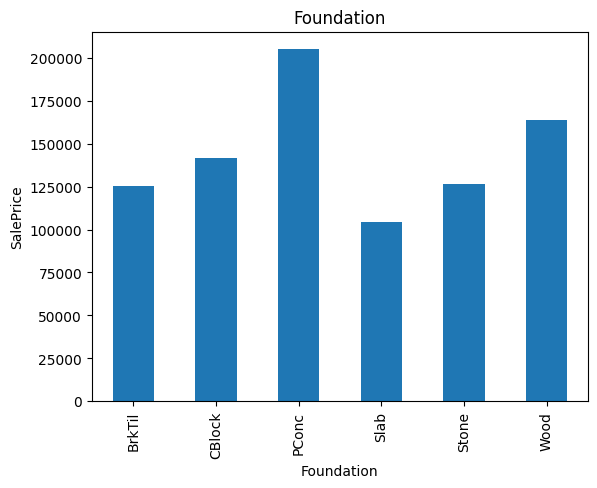

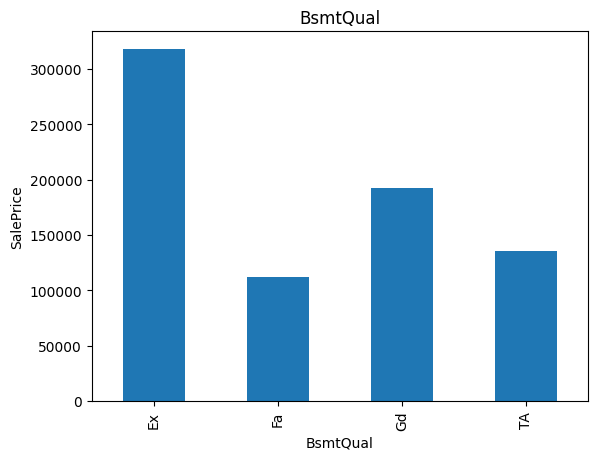

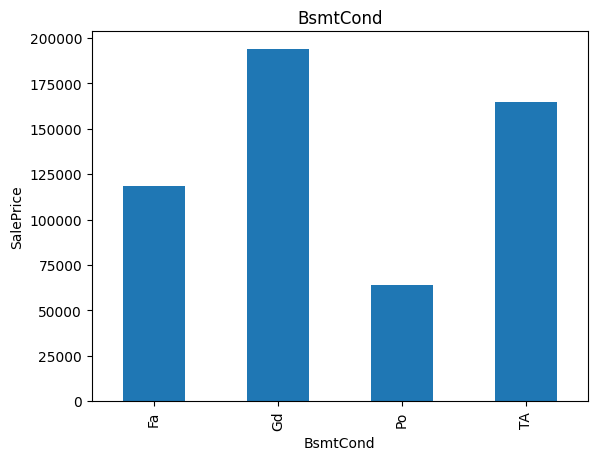

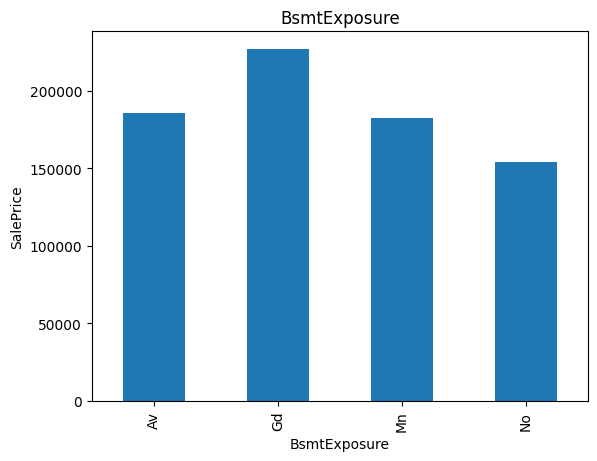

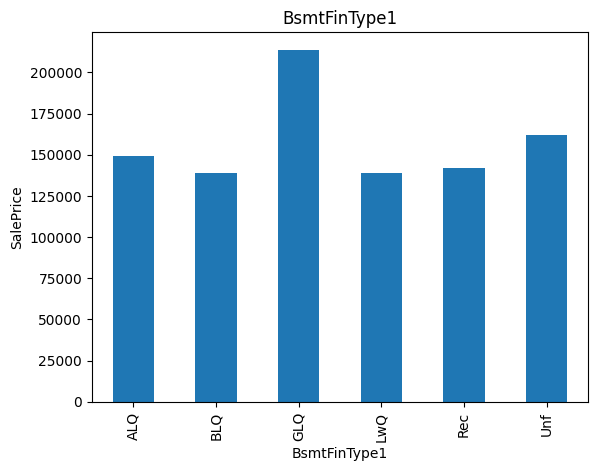

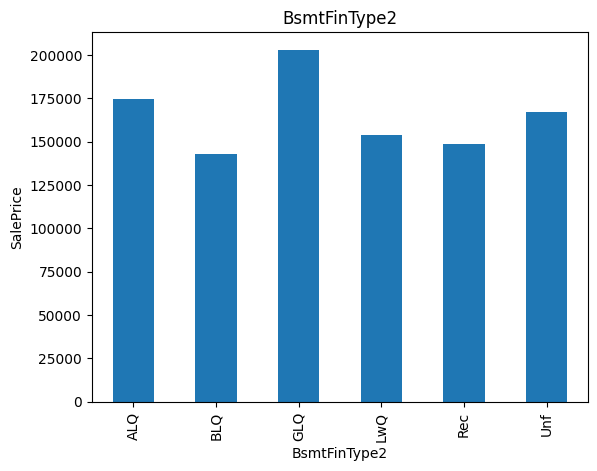

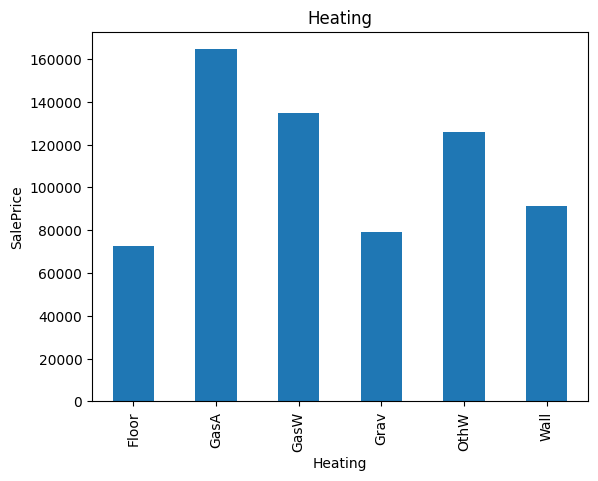

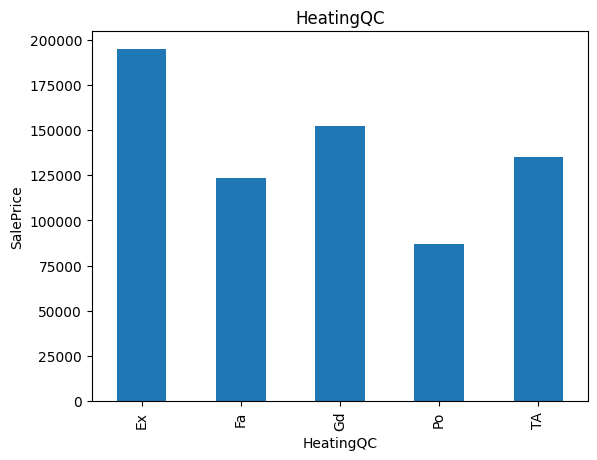

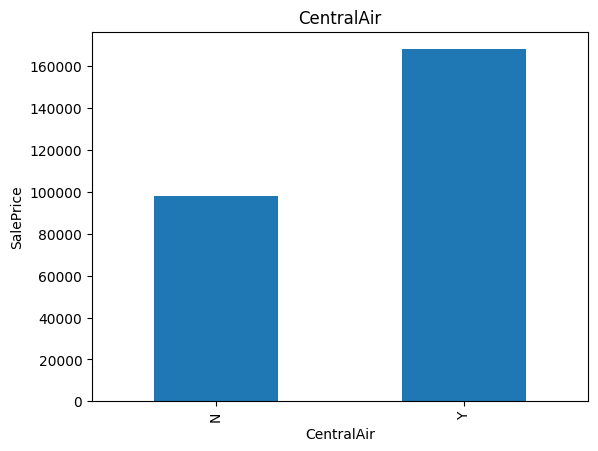

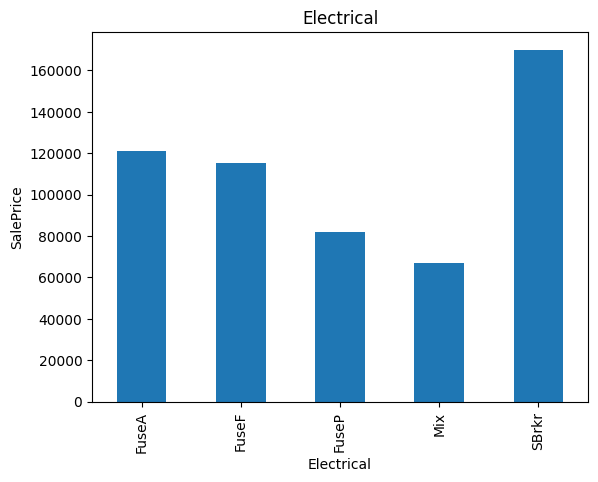

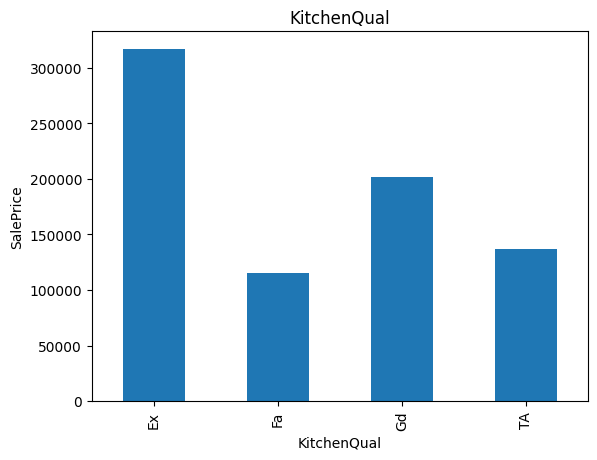

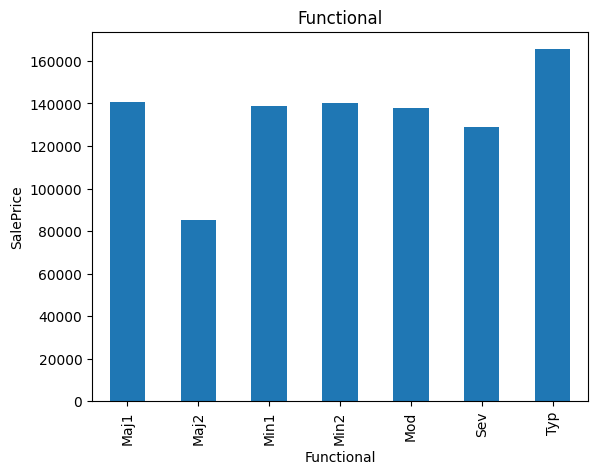

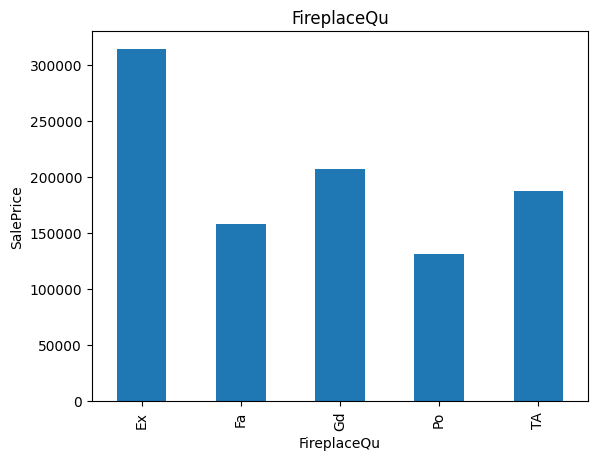

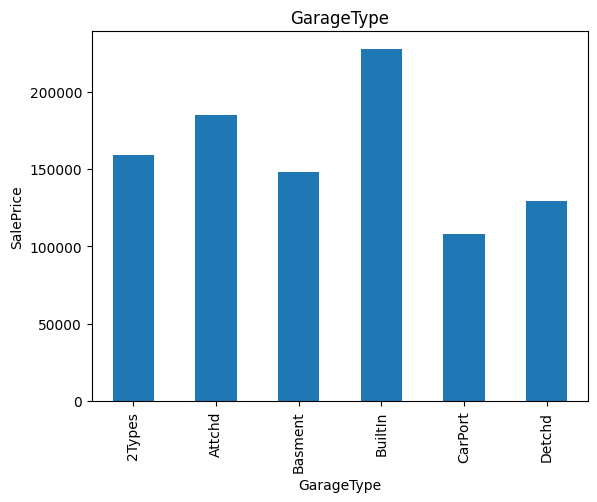

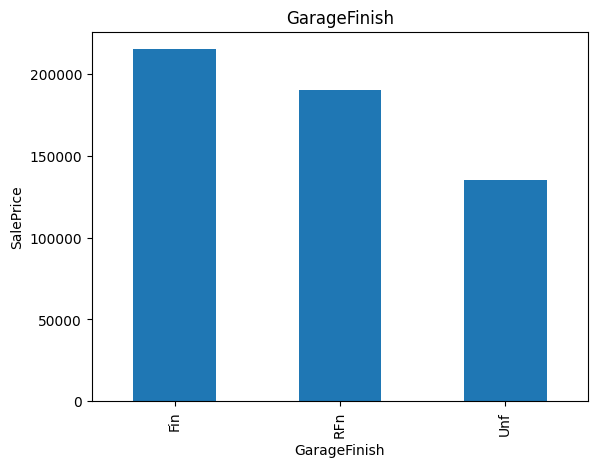

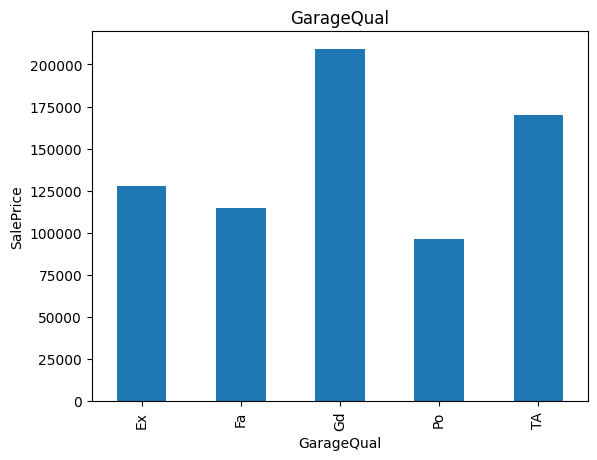

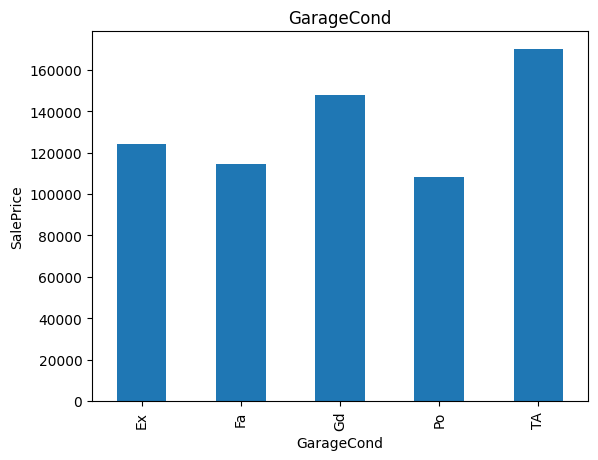

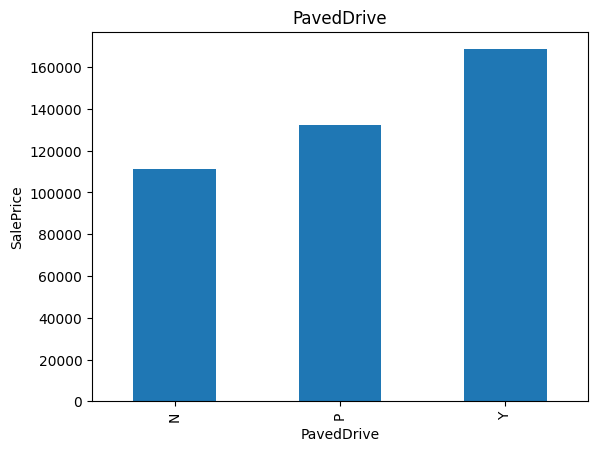

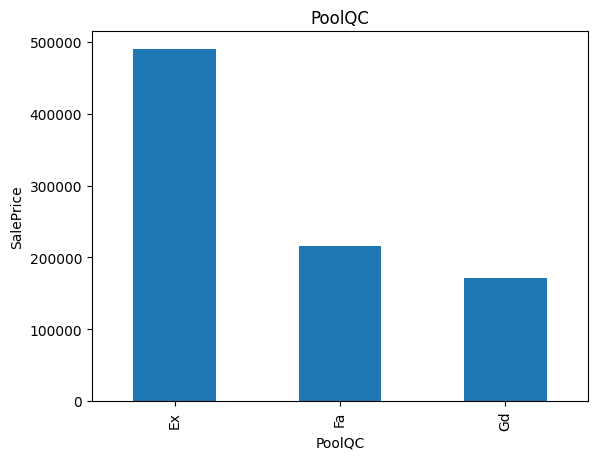

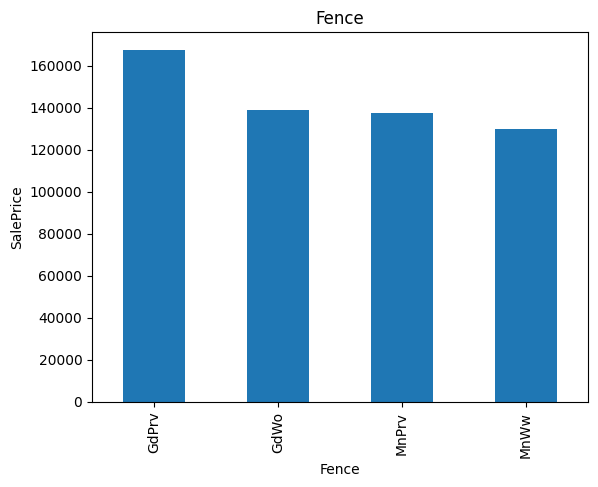

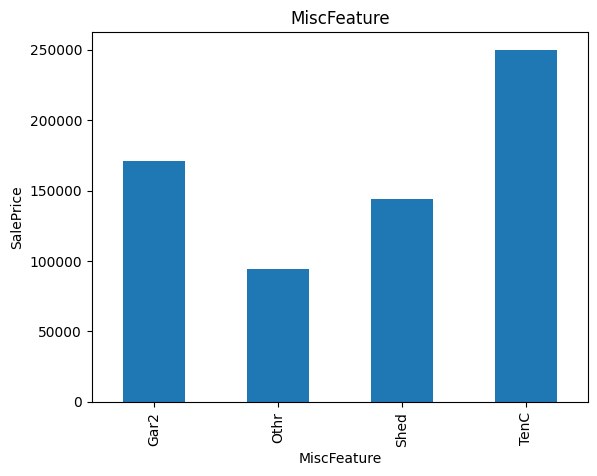

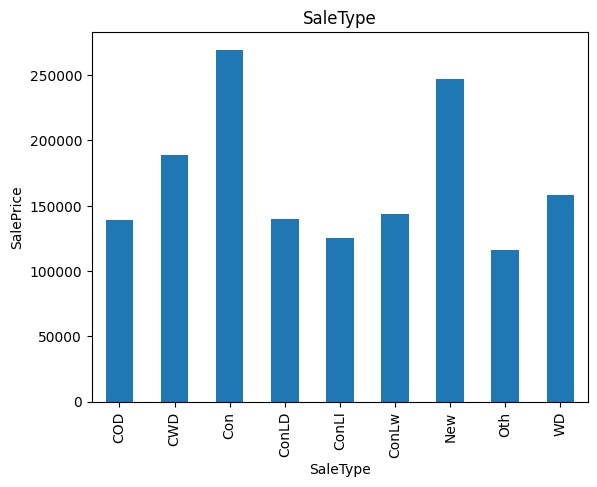

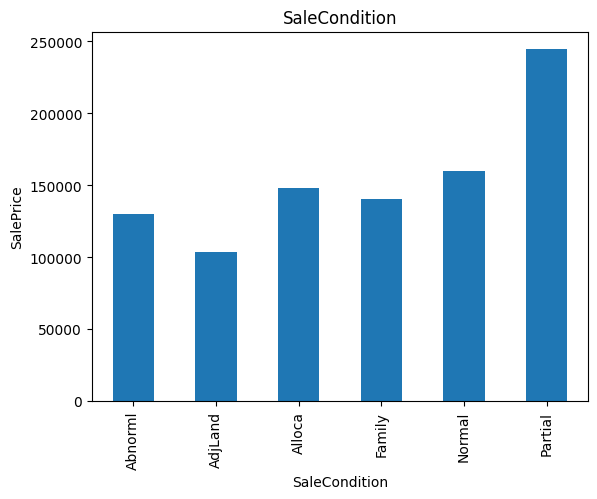

In [ ]:
for feature in categorical_features:
  data = df.copy()

  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

#### 6. Outliers

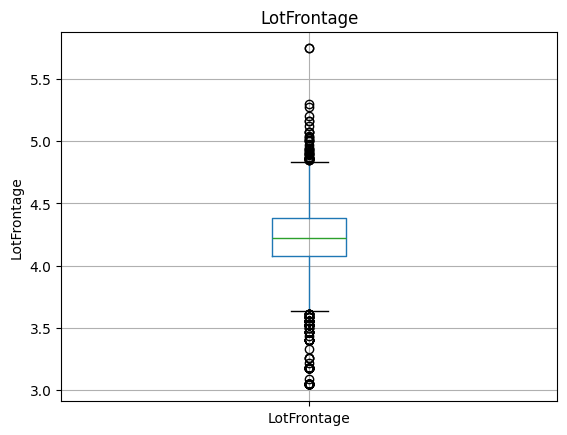

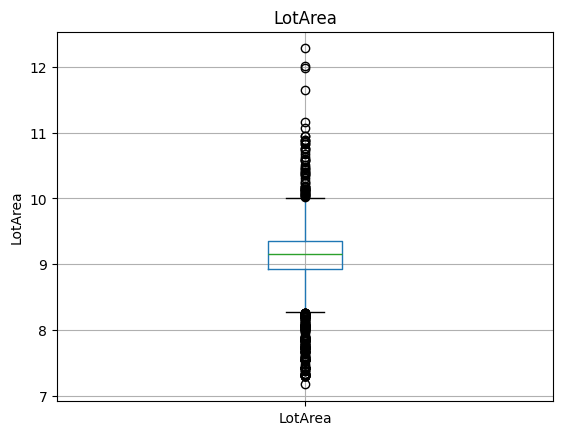

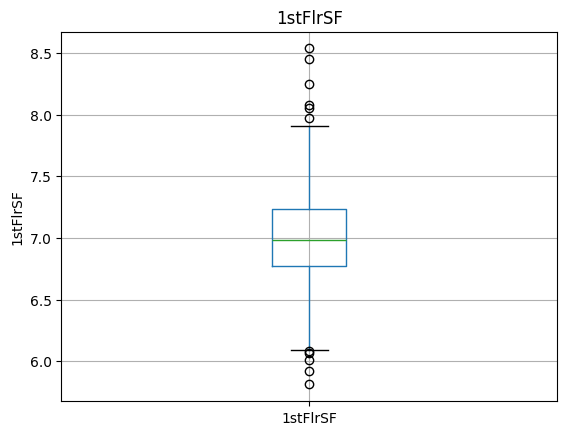

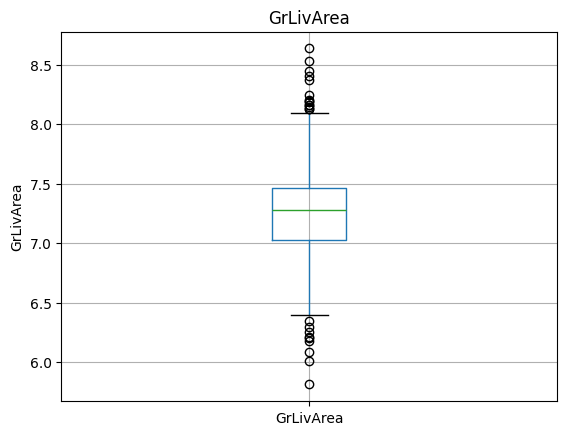

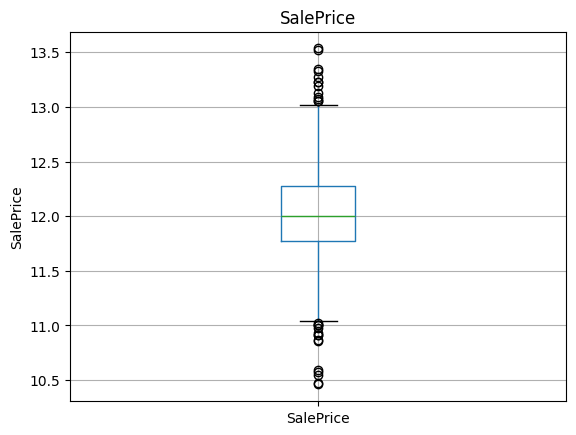

In [ ]:
for feature in continuous_feature:
  data = df.copy()

  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])

    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Feature Engineering

We will be performing all these steps -

1. Missing Values
2. Temporal variables
3. Numerical variables: transform skewed data
4. Categorical variables: remove rare labels
5. Standarise the value of the variables to the same range
6. Feature Scaling

#### Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =0)


print(f'X_train shape - {X_train.shape}')
print(f'X_test shape - {X_test.shape}')

print()

print(f'y_train shape - {y_train.shape}')
print(f'y_test shape - {y_test.shape}')

X_train shape - (2043, 80)
X_test shape - (876, 80)

y_train shape - (2043,)
y_test shape - (876,)


In [ ]:
# Merge X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,1910,2000,Gable,CompShg,MetalSd,HdBoard,NaN,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,560.0,560.0,GasA,Gd,N,SBrkr,796,550,0,1346,0.0,0.0,1,1,2,1,TA,6,Min2,0,NaN,Detchd,1950.0,Unf,1.0,384.0,Fa,TA,Y,168,24,0,0,0,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000.0
1397,1398,70,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,5,8,1920,2004,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,939.0,939.0,GasA,Ex,Y,SBrkr,939,574,0,1513,0.0,0.0,1,1,4,1,TA,8,Typ,0,NaN,Detchd,1933.0,Unf,1.0,180.0,Fa,Fa,N,24,0,150,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,137500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
384,385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985.0,Unf,0.0,595.0,1580.0,GasA,Ex,Y,SBrkr,1079,874,0,1953,1.0,0.0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,1992.0,Fin,2.0,501.0,TA,TA,Y,216,231,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,240000.0
530,531,80,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,5,1988,1989,Gable,CompShg,HdBoard,HdBoard,BrkFace,219.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,783.0,Unf,0.0,678.0,1461.0,GasA,Ex,Y,SBrkr,1509,0,0,1509,1.0,0.0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1988.0,RFn,2.0,600.0,TA,TA,Y,224,0,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Abnorml,175000.0


#### 1a. Missing Values - Detection

##### Categorical Features

In [ ]:
train_data[train_data.columns].isnull().sum()>0

,0
Id,False
MSSubClass,False
MSZoning,True
LotFrontage,True
LotArea,False
...,...
MoSold,False
YrSold,False
SaleType,False
SaleCondition,False


In [ ]:
features_nan = [feature for feature in train_data.columns if train_data[feature].isnull().sum()>0 and train_data[feature].dtypes == 'O']
features_nan

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
for feature in features_nan:
  print(f"{feature}: {np.round(train_data[feature].isnull().mean(), 4)}% missing values")

MSZoning: 0.001% missing values
Alley: 0.9349% missing values
Utilities: 0.0005% missing values
Exterior1st: 0.0005% missing values
Exterior2nd: 0.0005% missing values
MasVnrType: 0.603% missing values
BsmtQual: 0.0279% missing values
BsmtCond: 0.0284% missing values
BsmtExposure: 0.0279% missing values
BsmtFinType1: 0.0269% missing values
BsmtFinType2: 0.0269% missing values
Functional: 0.0005% missing values
FireplaceQu: 0.4895% missing values
GarageType: 0.0573% missing values
GarageFinish: 0.0582% missing values
GarageQual: 0.0582% missing values
GarageCond: 0.0582% missing values
PoolQC: 0.9971% missing values
Fence: 0.7993% missing values
MiscFeature: 0.9662% missing values


In [ ]:
def repalce_cat_feature(datast, features_nan):
  data = train_data.copy()
  data[features_nan] = data[features_nan].fillna('Missing')
  return data

train_data = repalce_cat_feature(train_data, features_nan)
train_data[features_nan].isnull().sum()

,0
MSZoning,0
Alley,0
Utilities,0
Exterior1st,0
Exterior2nd,0
MasVnrType,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0


In [ ]:
train_data[features_nan].head()

,MSZoning,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
1448,RL,Missing,AllPub,MetalSd,HdBoard,Missing,Fa,TA,No,Unf,Unf,Min2,Missing,Detchd,Unf,Fa,TA,Missing,GdWo,Missing
1397,RM,Missing,AllPub,MetalSd,MetalSd,Missing,TA,TA,Mn,Unf,Unf,Typ,Missing,Detchd,Unf,Fa,Fa,Missing,Missing,Missing
1,RL,Missing,AllPub,MetalSd,MetalSd,Missing,Gd,TA,Gd,ALQ,Unf,Typ,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
384,RL,Missing,AllPub,HdBoard,HdBoard,Missing,Gd,TA,Av,GLQ,Unf,Typ,Fa,Attchd,Fin,TA,TA,Missing,Missing,Missing
530,RL,Missing,AllPub,HdBoard,HdBoard,BrkFace,Gd,TA,Av,GLQ,Unf,Typ,Fa,Attchd,RFn,TA,TA,Missing,Missing,Missing


##### Numerical Features

In [ ]:
train_data[train_data.columns].isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,333
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
numerical_with_nan = [feature for feature in train_data.columns if train_data[feature].isnull().sum() > 0 and train_data[feature].dtypes != 'O']
numerical_with_nan

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [ ]:
train_data[numerical_with_nan].head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
1448,70.0,0.0,0.0,0.0,560.0,560.0,0.0,0.0,1950.0,1.0,384.0,112000.0
1397,51.0,0.0,0.0,0.0,939.0,939.0,0.0,0.0,1933.0,1.0,180.0,137500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
384,NaN,0.0,985.0,0.0,595.0,1580.0,1.0,0.0,1992.0,2.0,501.0,240000.0
530,85.0,219.0,783.0,0.0,678.0,1461.0,1.0,0.0,1988.0,2.0,600.0,175000.0


In [ ]:
for feature in numerical_with_nan:
  print(f"{feature}: {np.round(train_data[feature].isnull().mean(), 4)}%")

LotFrontage: 0.163%
MasVnrArea: 0.0069%
BsmtFinSF1: 0.0005%
BsmtFinSF2: 0.0005%
BsmtUnfSF: 0.0005%
TotalBsmtSF: 0.0005%
BsmtFullBath: 0.001%
BsmtHalfBath: 0.001%
GarageYrBlt: 0.0582%
GarageCars: 0.0005%
GarageArea: 0.0005%
SalePrice: 0.5076%


#### 1b. Missing Values - Replacing

##### Numerical values

In [ ]:
for feature in numerical_with_nan:
  # we are going to replace by using median since there are outliers
  median_val = train_data[feature].median()

  ## create a new feature to capture whether still there are any nan values
  train_data[feature + 'nan'] = np.where(train_data[feature].isnull(), 1, 0)
  train_data[feature].fillna(median_val, inplace = True)

train_data[numerical_with_nan].isnull().sum()

,0
LotFrontage,0
MasVnrArea,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
BsmtFullBath,0
BsmtHalfBath,0
GarageYrBlt,0
GarageCars,0


In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
1448,1449,50,RL,70.0,11767,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,1910,2000,Gable,CompShg,MetalSd,HdBoard,Missing,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,560.0,560.0,GasA,Gd,N,SBrkr,796,550,0,1346,0.0,0.0,1,1,2,1,TA,6,Min2,0,Missing,Detchd,1950.0,Unf,1.0,384.0,Fa,TA,Y,168,24,0,0,0,0,Missing,GdWo,Missing,0,5,2007,WD,Normal,112000.0,0,0,0,0,0,0,0,0,0,0,0,0
1397,1398,70,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,5,8,1920,2004,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,939.0,939.0,GasA,Ex,Y,SBrkr,939,574,0,1513,0.0,0.0,1,1,4,1,TA,8,Typ,0,Missing,Detchd,1933.0,Unf,1.0,180.0,Fa,Fa,N,24,0,150,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,137500.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0,0,0,0,0,0,0
384,385,60,RL,68.0,53107,Pave,Missing,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,Missing,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985.0,Unf,0.0,595.0,1580.0,GasA,Ex,Y,SBrkr,1079,874,0,1953,1.0,0.0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,1992.0,Fin,2.0,501.0,TA,TA,Y,216,231,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal,240000.0,1,0,0,0,0,0,0,0,0,0,0,0
530,531,80,RL,85.0,10200,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,5,1988,1989,Gable,CompShg,HdBoard,HdBoard,BrkFace,219.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,783.0,Unf,0.0,678.0,1461.0,GasA,Ex,Y,SBrkr,1509,0,0,1509,1.0,0.0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1988.0,RFn,2.0,600.0,TA,TA,Y,224,0,0,0,0,0,Missing,Missing,Missing,0,8,2008,WD,Abnorml,175000.0,0,0,0,0,0,0,0,0,0,0,0,0


#### 2. Temporal Variable

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for feature in year_feature:
  if feature != 'YrSold':

    # capture the difference between year variable and the year, the house was sold for
    train_data[feature] = train_data['YrSold'] - train_data[feature]

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
1448,1449,50,RL,70.0,11767,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,97,7,Gable,CompShg,MetalSd,HdBoard,Missing,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,560.0,560.0,GasA,Gd,N,SBrkr,796,550,0,1346,0.0,0.0,1,1,2,1,TA,6,Min2,0,Missing,Detchd,57.0,Unf,1.0,384.0,Fa,TA,Y,168,24,0,0,0,0,Missing,GdWo,Missing,0,5,2007,WD,Normal,112000.0,0,0,0,0,0,0,0,0,0,0,0,0
1397,1398,70,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,5,8,87,3,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,939.0,939.0,GasA,Ex,Y,SBrkr,939,574,0,1513,0.0,0.0,1,1,4,1,TA,8,Typ,0,Missing,Detchd,74.0,Unf,1.0,180.0,Fa,Fa,N,24,0,150,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,137500.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0,0,0,0,0,0,0
384,385,60,RL,68.0,53107,Pave,Missing,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,15,15,Gable,CompShg,HdBoard,HdBoard,Missing,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985.0,Unf,0.0,595.0,1580.0,GasA,Ex,Y,SBrkr,1079,874,0,1953,1.0,0.0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,15.0,Fin,2.0,501.0,TA,TA,Y,216,231,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal,240000.0,1,0,0,0,0,0,0,0,0,0,0,0
530,531,80,RL,85.0,10200,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,5,20,19,Gable,CompShg,HdBoard,HdBoard,BrkFace,219.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,783.0,Unf,0.0,678.0,1461.0,GasA,Ex,Y,SBrkr,1509,0,0,1509,1.0,0.0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,20.0,RFn,2.0,600.0,TA,TA,Y,224,0,0,0,0,0,Missing,Missing,Missing,0,8,2008,WD,Abnorml,175000.0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data[year_feature]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
1448,97,7,57.0,2007
1397,87,3,74.0,2007
1,31,31,31.0,2007
384,15,15,15.0,2007
530,20,19,20.0,2008
...,...,...,...,...
763,10,10,10.0,2009
835,60,15,14.0,2010
1653,33,33,33.0,2009
2607,30,13,30.0,2007


#### 3. Numerical variables: transform skewed data

Since some of the numerical variables are skewed, thy we will perform log normal distribution

In [ ]:
num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_features:
  train_data[feature] = np.log(train_data[feature])

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
1448,1449,50,RL,4.248495,9.373054,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,97,7,Gable,CompShg,MetalSd,HdBoard,Missing,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,560.0,560.0,GasA,Gd,N,SBrkr,6.679599,550,0,7.204893,0.0,0.0,1,1,2,1,TA,6,Min2,0,Missing,Detchd,57.0,Unf,1.0,384.0,Fa,TA,Y,168,24,0,0,0,0,Missing,GdWo,Missing,0,5,2007,WD,Normal,11.626254,0,0,0,0,0,0,0,0,0,0,0,0
1397,1398,70,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,5,8,87,3,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,939.0,939.0,GasA,Ex,Y,SBrkr,6.844815,574,0,7.321850,0.0,0.0,1,1,4,1,TA,8,Typ,0,Missing,Detchd,74.0,Unf,1.0,180.0,Fa,Fa,N,24,0,150,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,11.831379,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0,0,0,0,0,0,0,0,0,0
384,385,60,RL,4.219508,10.880064,Pave,Missing,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,15,15,Gable,CompShg,HdBoard,HdBoard,Missing,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985.0,Unf,0.0,595.0,1580.0,GasA,Ex,Y,SBrkr,6.983790,874,0,7.577122,1.0,0.0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,15.0,Fin,2.0,501.0,TA,TA,Y,216,231,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal,12.388394,1,0,0,0,0,0,0,0,0,0,0,0
530,531,80,RL,4.442651,9.230143,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,5,20,19,Gable,CompShg,HdBoard,HdBoard,BrkFace,219.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,783.0,Unf,0.0,678.0,1461.0,GasA,Ex,Y,SBrkr,7.319202,0,0,7.319202,1.0,0.0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,20.0,RFn,2.0,600.0,TA,TA,Y,224,0,0,0,0,0,Missing,Missing,Missing,0,8,2008,WD,Abnorml,12.072541,0,0,0,0,0,0,0,0,0,0,0,0


#### 4. Categorical variables: remove rare labels

We will remove categorical variables that are present less than 1% of the observations

In [ ]:
len(train_data)

2043

In [ ]:
for feature in categorical_features:
  temp = train_data.groupby(feature)['SalePrice'].count()
temp

,SalePrice
SaleCondition,
Abnorml,140
AdjLand,8
Alloca,20
Family,32
Normal,1669
Partial,174


In [ ]:
for feature in categorical_features:
  temp = train_data.groupby(feature)['SalePrice'].count()/len(train_data)

  print(temp, '\n')

MSZoning
C (all)    0.008321
FV         0.046500
Missing    0.000979
RH         0.008811
RL         0.780715
RM         0.154674
Name: SalePrice, dtype: float64 

Street
Grvl    0.003426
Pave    0.996574
Name: SalePrice, dtype: float64 

Alley
Grvl       0.038179
Missing    0.934900
Pave       0.026921
Name: SalePrice, dtype: float64 

LotShape
IR1    0.336270
IR2    0.025942
IR3    0.004895
Reg    0.632893
Name: SalePrice, dtype: float64 

LandContour
Bnk    0.042584
HLS    0.040137
Low    0.022026
Lvl    0.895252
Name: SalePrice, dtype: float64 

Utilities
AllPub     0.999021
Missing    0.000489
NoSeWa     0.000489
Name: SalePrice, dtype: float64 

LotConfig
Corner     0.166911
CulDSac    0.059227
FR2        0.028390
FR3        0.003426
Inside     0.742046
Name: SalePrice, dtype: float64 

LandSlope
Gtl    0.946158
Mod    0.047479
Sev    0.006363
Name: SalePrice, dtype: float64 

Neighborhood
Blmngtn    0.008321
Blueste    0.002447
BrDale     0.011747
BrkSide    0.037690
ClearCr    0

In [ ]:
for feature in categorical_features:
  temp = train_data.groupby(feature)['SalePrice'].count()/len(train_data)
  temp_train_data = temp[temp > 0.01].index

  print(temp_train_data, '\n')

Index(['FV', 'RL', 'RM'], dtype='object', name='MSZoning') 

Index(['Pave'], dtype='object', name='Street') 

Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley') 

Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape') 

Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour') 

Index(['AllPub'], dtype='object', name='Utilities') 

Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig') 

Index(['Gtl', 'Mod'], dtype='object', name='LandSlope') 

Index(['BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards',
       'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood') 

Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAe', 'RRAn'], dtype='object', name='Condition1') 

Index(['Norm'], dtype='object', name='Condition2') 

Index(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'T

In [ ]:
for feature in categorical_features:
  temp = train_data.groupby(feature)['SalePrice'].count()/len(train_data)
  temp_train_data = temp[temp > 0.01].index
  train_data[feature] = np.where(train_data[feature].isin(temp_train_data), train_data[feature], 'Rare_var')

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
1448,1449,50,RL,4.248495,9.373054,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,97,7,Gable,CompShg,MetalSd,HdBoard,Missing,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,560.0,560.0,GasA,Gd,N,SBrkr,6.679599,550,0,7.204893,0.0,0.0,1,1,2,1,TA,6,Min2,0,Missing,Detchd,57.0,Unf,1.0,384.0,Fa,TA,Y,168,24,0,0,0,0,Missing,GdWo,Missing,0,5,2007,WD,Normal,11.626254,0,0,0,0,0,0,0,0,0,0,0,0
1397,1398,70,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,5,8,87,3,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,939.0,939.0,GasA,Ex,Y,SBrkr,6.844815,574,0,7.321850,0.0,0.0,1,1,4,1,TA,8,Typ,0,Missing,Detchd,74.0,Unf,1.0,180.0,Fa,Fa,N,24,0,150,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,11.831379,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0,0,0,0,0,0,0,0,0,0
384,385,60,RL,4.219508,10.880064,Pave,Missing,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,15,15,Gable,CompShg,HdBoard,HdBoard,Missing,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985.0,Unf,0.0,595.0,1580.0,GasA,Ex,Y,SBrkr,6.983790,874,0,7.577122,1.0,0.0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,15.0,Fin,2.0,501.0,TA,TA,Y,216,231,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal,12.388394,1,0,0,0,0,0,0,0,0,0,0,0
530,531,80,RL,4.442651,9.230143,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,5,20,19,Gable,CompShg,HdBoard,HdBoard,BrkFace,219.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,783.0,Unf,0.0,678.0,1461.0,GasA,Ex,Y,SBrkr,7.319202,0,0,7.319202,1.0,0.0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,20.0,RFn,2.0,600.0,TA,TA,Y,224,0,0,0,0,0,Missing,Missing,Missing,0,8,2008,WD,Abnorml,12.072541,0,0,0,0,0,0,0,0,0,0,0,0


#### 5. Encoding - Standarise the value of the variables to the same range

In [ ]:
for feature in categorical_features:
  labels_ordered = train_data.groupby([feature])['SalePrice'].mean().sort_values().index

  print(labels_ordered, '\n')

Index(['Rare_var', 'RM', 'RL', 'FV'], dtype='object', name='MSZoning') 

Index(['Pave', 'Rare_var'], dtype='object', name='Street') 

Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley') 

Index(['Reg', 'IR1', 'Rare_var', 'IR2'], dtype='object', name='LotShape') 

Index(['Bnk', 'Lvl', 'Low', 'HLS'], dtype='object', name='LandContour') 

Index(['Rare_var', 'AllPub'], dtype='object', name='Utilities') 

Index(['Inside', 'Corner', 'FR2', 'Rare_var', 'CulDSac'], dtype='object', name='LotConfig') 

Index(['Gtl', 'Mod', 'Rare_var'], dtype='object', name='LandSlope') 

Index(['BrDale', 'MeadowV', 'IDOTRR', 'BrkSide', 'OldTown', 'Edwards',
       'Sawyer', 'NAmes', 'Mitchel', 'SWISU', 'SawyerW', 'Rare_var', 'NWAmes',
       'Gilbert', 'CollgCr', 'Crawfor', 'Somerst', 'ClearCr', 'Timber',
       'StoneBr', 'NridgHt', 'NoRidge'],
      dtype='object', name='Neighborhood') 

Index(['Artery', 'Feedr', 'RRAe', 'RRAn', 'Norm', 'PosN', 'Rare_var'], dtype='object', name='Condition1') 

Ind

In [ ]:
for feature in categorical_features:
  labels_ordered = train_data.groupby([feature])['SalePrice'].mean().sort_values().index
  labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}

  print(labels_ordered, '\n')

{'Rare_var': 0, 'RM': 1, 'RL': 2, 'FV': 3} 

{'Pave': 0, 'Rare_var': 1} 

{'Grvl': 0, 'Missing': 1, 'Pave': 2} 

{'Reg': 0, 'IR1': 1, 'Rare_var': 2, 'IR2': 3} 

{'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3} 

{'Rare_var': 0, 'AllPub': 1} 

{'Inside': 0, 'Corner': 1, 'FR2': 2, 'Rare_var': 3, 'CulDSac': 4} 

{'Gtl': 0, 'Mod': 1, 'Rare_var': 2} 

{'BrDale': 0, 'MeadowV': 1, 'IDOTRR': 2, 'BrkSide': 3, 'OldTown': 4, 'Edwards': 5, 'Sawyer': 6, 'NAmes': 7, 'Mitchel': 8, 'SWISU': 9, 'SawyerW': 10, 'Rare_var': 11, 'NWAmes': 12, 'Gilbert': 13, 'CollgCr': 14, 'Crawfor': 15, 'Somerst': 16, 'ClearCr': 17, 'Timber': 18, 'StoneBr': 19, 'NridgHt': 20, 'NoRidge': 21} 

{'Artery': 0, 'Feedr': 1, 'RRAe': 2, 'RRAn': 3, 'Norm': 4, 'PosN': 5, 'Rare_var': 6} 

{'Rare_var': 0, 'Norm': 1} 

{'2fmCon': 0, 'Twnhs': 1, 'Duplex': 2, '1Fam': 3, 'TwnhsE': 4} 

{'SFoyer': 0, '1.5Fin': 1, 'Rare_var': 2, '1Story': 3, 'SLvl': 4, '2Story': 5} 

{'Gable': 0, 'Rare_var': 1, 'Hip': 2} 

{'CompShg': 0, 'Rare_var': 1} 

{'AsbShng'

In [ ]:
# mean encoding or target-based encoding
for feature in categorical_features:
  labels_ordered = train_data.groupby([feature])['SalePrice'].mean().sort_values().index
  labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
  train_data[feature] = train_data[feature].map(labels_ordered)


train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
1448,1449,50,2,4.248495,9.373054,0,1,0,1,1,0,0,5,4,1,3,5,4,7,97,7,0,0,4,6,1,0.0,1,3,2,1,3,1,4,0.0,5,0.0,560.0,560.0,2,3,0,3,6.679599,550,0,7.204893,0.0,0.0,1,1,2,1,1,6,2,0,0,1,57.0,1,1.0,384.0,1,3,2,168,24,0,0,0,0,0,1,2,0,5,2007,2,3,11.626254,0,0,0,0,0,0,0,0,0,0,0,0
1397,1398,70,1,3.931826,8.719317,0,1,0,1,1,0,0,3,4,1,3,5,5,8,87,3,0,0,4,3,1,0.0,1,3,1,2,3,2,4,0.0,5,0.0,939.0,939.0,2,4,1,3,6.844815,574,0,7.321850,0.0,0.0,1,1,4,1,1,8,4,0,0,1,74.0,1,1.0,180.0,1,1,0,24,0,150,0,0,0,0,4,2,0,5,2007,2,3,11.831379,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,2,4.382027,9.169518,0,1,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,5,978.0,5,0.0,284.0,1262.0,2,4,1,3,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,1,6,4,1,3,4,31.0,2,2.0,460.0,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0,0,0,0,0,0,0,0,0,0
384,385,60,2,4.219508,10.880064,0,1,3,2,1,1,1,17,1,1,3,5,6,5,15,15,0,0,6,6,1,0.0,2,3,4,3,3,3,6,985.0,5,0.0,595.0,1580.0,2,4,1,3,6.983790,874,0,7.577122,1.0,0.0,2,1,3,1,2,9,4,2,2,4,15.0,3,2.0,501.0,2,3,2,216,231,0,0,0,0,0,4,2,0,6,2007,2,3,12.388394,1,0,0,0,0,0,0,0,0,0,0,0
530,531,80,2,4.442651,9.230143,0,1,0,1,1,0,0,18,4,1,3,4,6,5,20,19,0,0,6,6,2,219.0,2,3,2,3,3,3,6,783.0,5,0.0,678.0,1461.0,2,4,1,3,7.319202,0,0,7.319202,1.0,0.0,2,0,3,1,2,5,4,1,2,4,20.0,2,2.0,600.0,2,3,2,224,0,0,0,0,0,0,4,2,0,8,2008,2,0,12.072541,0,0,0,0,0,0,0,0,0,0,0,0


#### 6. Feature Scaling

In [ ]:
feature_scale =[feature for feature in train_data.columns if feature not in ['Id', 'SalePrice']]
feature_scale

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data[feature_scale])

MinMaxScaler()

In [ ]:
scaler.transform(train_data[feature_scale])

array([[0.17647059, 0.66666667, 0.44563844, ..., 0.        , 0.        ,
        0.        ],
       [0.29411765, 0.33333333, 0.32842637, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.82352941, 0.66666667, 0.0494253 , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.66666667, 0.39469927, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.66666667, 0.49506375, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
pd.DataFrame(scaler.transform(train_data[feature_scale]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,0.176471,0.666667,0.445638,0.431152,0.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.238095,0.666667,1.0,0.75,1.0,0.333333,0.750,0.720588,0.145161,0.0,0.0,0.4,0.6,0.333333,0.000000,0.333333,1.0,0.50,0.25,0.75,0.25,0.666667,0.000000,0.833333,0.0,0.261682,0.091653,1.0,0.75,0.0,1.0,0.318715,0.266344,0.0,0.493040,0.000000,0.0,0.25,0.5,0.250,0.333333,0.333333,0.307692,0.50,0.000000,0.0,0.2,0.821086,0.333333,0.2,0.258065,0.333333,1.000000,1.0,0.117978,0.042105,0.000000,0.0,0.0000,0.0,0.0,0.25,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.294118,0.333333,0.328426,0.303205,0.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.142857,0.666667,1.0,0.75,1.0,0.444444,0.875,0.647059,0.080645,0.0,0.0,0.4,0.3,0.333333,0.000000,0.333333,1.0,0.25,0.50,0.75,0.50,0.666667,0.000000,0.833333,0.0,0.438785,0.153682,1.0,1.00,1.0,1.0,0.379348,0.277966,0.0,0.534414,0.000000,0.0,0.25,0.5,0.500,0.333333,0.333333,0.461538,1.00,0.000000,0.0,0.2,0.875399,0.333333,0.2,0.120968,0.333333,0.333333,0.0,0.016854,0.000000,0.148221,0.0,0.0000,0.0,0.0,1.00,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.666667,0.495064,0.391317,0.0,0.5,0.000000,0.333333,1.0,0.50,0.0,0.523810,0.166667,1.0,0.75,0.6,0.555556,0.875,0.235294,0.532258,0.0,0.0,0.4,0.3,0.333333,0.000000,0.333333,1.0,0.50,0.75,0.75,1.00,0.833333,0.173281,0.833333,0.0,0.132710,0.206547,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.333333,0.307692,1.00,0.333333,0.6,0.8,0.738019,0.666667,0.4,0.309140,0.666667,1.000000,1.0,0.209270,0.000000,0.000000,0.0,0.0000,0.0,0.0,1.00,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.666667,0.434909,0.726100,0.0,0.5,1.000000,0.666667,1.0,0.25,0.5,0.809524,0.166667,1.0,0.75,1.0,0.555556,0.500,0.117647,0.274194,0.0,0.0,0.6,0.6,0.333333,0.000000,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.174522,0.833333,0.0,0.278037,0.258592,1.0,1.00,1.0,1.0,0.430350,0.423245,0.0,0.624716,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.538462,1.00,0.666667,0.4,0.8,0.686901,1.000000,0.4,0.336694,0.666667,1.000000,1.0,0.151685,0.405263,0.000000,0.0,0.0000,0.0,0.0,1.00,1.0,0.0,0.454545,0.25,0.666667,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.352941,0.666667,0.517503,0.403182,0.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.857143,0.666667,1.0,0.75,0.8,0.555556,0.500,0.154412,0.338710,0.0,0.0,0.6,0.6,0.666667,0.136875,0.666667,1.0,0.50,0.75,0.75,0.75,1.000000,0.138731,0.833333,0.0,0.316822,0.239116,1.0,1.00,1.0,1.0,0.553443,0.000000,0.0,0.533477,0.333333,0.0,0.50,0.0,0.375,0.333333,0.666667,0.230769,1.00,0.333333,0.4,0.8,0.702875,0.666667,0.4,0.403226,0.666667,1.000000,1.0,0.157303,0.000000,0.000000,0.0,0.0000,0.0,0.0,1.00,1.0,0.0,0.636364,0.50,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,0.235294,0.666667,0.504203,0.387820,0.0,0.5,0.000000,0.333333,1.0,0.00,0.0,1.000000,0.666667,1.0,0.75,1.0,0.777778,0.500,0.080882,0.193548,0.0,0.0,1.0,1.0,0.666667,0.420625,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.206060,0.833333,0.0,0.041589,0.204910,1.0,1.00,1.0,1.0,0.489584,0.531235,0.0,0.692428,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.461538,1.00,0.333333,0.8,0.8,0.670927,0.666667,0.6,0.575269,0.666667,1.000000,1.0,0.000000,0.224561,0.000000,0.0,0.3125,0.0,0.0,1.00,1.0,0.0,0.545455,0.75,0.66666

In [ ]:
train_data[['Id', 'SalePrice']].reset_index(drop = True)

,Id,SalePrice
0,1449,11.626254
1,1398,11.831379
2,2,12.109011
3,385,12.388394
4,531,12.072541
...,...,...
2038,764,12.727838
2039,836,11.759786
2040,1654,11.986672
2041,2608,11.986672


In [ ]:
train_data = pd.concat([train_data[['Id', 'SalePrice']].reset_index(drop = True),
                 pd.DataFrame(scaler.transform(train_data[feature_scale]), columns = feature_scale)],
                 axis = 1)

train_data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
0,1449,11.626254,0.176471,0.666667,0.445638,0.431152,0.0,0.5,0.0,0.333333,1.0,0.00,0.0,0.238095,0.666667,1.0,0.75,1.0,0.333333,0.750,0.720588,0.145161,0.0,0.0,0.4,0.6,0.333333,0.000000,0.333333,1.0,0.50,0.25,0.75,0.25,0.666667,0.000000,0.833333,0.0,0.261682,0.091653,1.0,0.75,0.0,1.0,0.318715,0.266344,0.0,0.493040,0.000000,0.0,0.25,0.5,0.250,0.333333,0.333333,0.307692,0.5,0.000000,0.0,0.2,0.821086,0.333333,0.2,0.258065,0.333333,1.000000,1.0,0.117978,0.042105,0.000000,0.0,0.0,0.0,0.0,0.25,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1398,11.831379,0.294118,0.333333,0.328426,0.303205,0.0,0.5,0.0,0.333333,1.0,0.00,0.0,0.142857,0.666667,1.0,0.75,1.0,0.444444,0.875,0.647059,0.080645,0.0,0.0,0.4,0.3,0.333333,0.000000,0.333333,1.0,0.25,0.50,0.75,0.50,0.666667,0.000000,0.833333,0.0,0.438785,0.153682,1.0,1.00,1.0,1.0,0.379348,0.277966,0.0,0.534414,0.000000,0.0,0.25,0.5,0.500,0.333333,0.333333,0.461538,1.0,0.000000,0.0,0.2,0.875399,0.333333,0.2,0.120968,0.333333,0.333333,0.0,0.016854,0.000000,0.148221,0.0,0.0,0.0,0.0,1.00,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,12.109011,0.000000,0.666667,0.495064,0.391317,0.0,0.5,0.0,0.333333,1.0,0.50,0.0,0.523810,0.166667,1.0,0.75,0.6,0.555556,0.875,0.235294,0.532258,0.0,0.0,0.4,0.3,0.333333,0.000000,0.333333,1.0,0.50,0.75,0.75,1.00,0.833333,0.173281,0.833333,0.0,0.132710,0.206547,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.333333,0.307692,1.0,0.333333,0.6,0.8,0.738019,0.666667,0.4,0.309140,0.666667,1.000000,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,385,12.388394,0.235294,0.666667,0.434909,0.726100,0.0,0.5,1.0,0.666667,1.0,0.25,0.5,0.809524,0.166667,1.0,0.75,1.0,0.555556,0.500,0.117647,0.274194,0.0,0.0,0.6,0.6,0.333333,0.000000,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.174522,0.833333,0.0,0.278037,0.258592,1.0,1.00,1.0,1.0,0.430350,0.423245,0.0,0.624716,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.538462,1.0,0.666667,0.4,0.8,0.686901,1.000000,0.4,0.336694,0.666667,1.000000,1.0,0.151685,0.405263,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.0,0.454545,0.25,0.666667,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,531,12.072541,0.352941,0.666667,0.517503,0.403182,0.0,0.5,0.0,0.333333,1.0,0.00,0.0,0.857143,0.666667,1.0,0.75,0.8,0.555556,0.500,0.154412,0.338710,0.0,0.0,0.6,0.6,0.666667,0.136875,0.666667,1.0,0.50,0.75,0.75,0.75,1.000000,0.138731,0.833333,0.0,0.316822,0.239116,1.0,1.00,1.0,1.0,0.553443,0.000000,0.0,0.533477,0.333333,0.0,0.50,0.0,0.375,0.333333,0.666667,0.230769,1.0,0.333333,0.4,0.8,0.702875,0.666667,0.4,0.403226,0.666667,1.000000,1.0,0.157303,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.0,0.636364,0.50,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# train_data.to_csv('train_data.csv', index = False)

### Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
y_train = train_data[['SalePrice']]
y_train

,SalePrice
0,11.626254
1,11.831379
2,12.109011
3,12.388394
4,12.072541
...,...
2038,12.727838
2039,11.759786
2040,11.986672
2041,11.986672


In [ ]:
X_train = train_data.drop(['Id', 'SalePrice'], axis = 1)
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
0,0.176471,0.666667,0.445638,0.431152,0.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.238095,0.666667,1.0,0.75,1.0,0.333333,0.750,0.720588,0.145161,0.0,0.0,0.4,0.6,0.333333,0.000000,0.333333,1.0,0.50,0.25,0.75,0.25,0.666667,0.000000,0.833333,0.0,0.261682,0.091653,1.0,0.75,0.0,1.0,0.318715,0.266344,0.0,0.493040,0.000000,0.0,0.25,0.5,0.250,0.333333,0.333333,0.307692,0.50,0.000000,0.0,0.2,0.821086,0.333333,0.2,0.258065,0.333333,1.000000,1.0,0.117978,0.042105,0.000000,0.0,0.0000,0.0,0.0,0.25,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.294118,0.333333,0.328426,0.303205,0.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.142857,0.666667,1.0,0.75,1.0,0.444444,0.875,0.647059,0.080645,0.0,0.0,0.4,0.3,0.333333,0.000000,0.333333,1.0,0.25,0.50,0.75,0.50,0.666667,0.000000,0.833333,0.0,0.438785,0.153682,1.0,1.00,1.0,1.0,0.379348,0.277966,0.0,0.534414,0.000000,0.0,0.25,0.5,0.500,0.333333,0.333333,0.461538,1.00,0.000000,0.0,0.2,0.875399,0.333333,0.2,0.120968,0.333333,0.333333,0.0,0.016854,0.000000,0.148221,0.0,0.0000,0.0,0.0,1.00,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.666667,0.495064,0.391317,0.0,0.5,0.000000,0.333333,1.0,0.50,0.0,0.523810,0.166667,1.0,0.75,0.6,0.555556,0.875,0.235294,0.532258,0.0,0.0,0.4,0.3,0.333333,0.000000,0.333333,1.0,0.50,0.75,0.75,1.00,0.833333,0.173281,0.833333,0.0,0.132710,0.206547,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.333333,0.307692,1.00,0.333333,0.6,0.8,0.738019,0.666667,0.4,0.309140,0.666667,1.000000,1.0,0.209270,0.000000,0.000000,0.0,0.0000,0.0,0.0,1.00,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.666667,0.434909,0.726100,0.0,0.5,1.000000,0.666667,1.0,0.25,0.5,0.809524,0.166667,1.0,0.75,1.0,0.555556,0.500,0.117647,0.274194,0.0,0.0,0.6,0.6,0.333333,0.000000,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.174522,0.833333,0.0,0.278037,0.258592,1.0,1.00,1.0,1.0,0.430350,0.423245,0.0,0.624716,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.538462,1.00,0.666667,0.4,0.8,0.686901,1.000000,0.4,0.336694,0.666667,1.000000,1.0,0.151685,0.405263,0.000000,0.0,0.0000,0.0,0.0,1.00,1.0,0.0,0.454545,0.25,0.666667,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.352941,0.666667,0.517503,0.403182,0.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.857143,0.666667,1.0,0.75,0.8,0.555556,0.500,0.154412,0.338710,0.0,0.0,0.6,0.6,0.666667,0.136875,0.666667,1.0,0.50,0.75,0.75,0.75,1.000000,0.138731,0.833333,0.0,0.316822,0.239116,1.0,1.00,1.0,1.0,0.553443,0.000000,0.0,0.533477,0.333333,0.0,0.50,0.0,0.375,0.333333,0.666667,0.230769,1.00,0.333333,0.4,0.8,0.702875,0.666667,0.4,0.403226,0.666667,1.000000,1.0,0.157303,0.000000,0.000000,0.0,0.0000,0.0,0.0,1.00,1.0,0.0,0.636364,0.50,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
# first, I specify the Lasso Regression model, and I select a suitable alpha(equivalent of penalty/p)
# the bigger the alpha the less features that will be selected
# then I use the SelectFromModel object from sklearn, which will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(f'features with coefficients shrank to zero: {np.sum(feature_sel_model.estimator_.coef_ == 0)}')

selected_feat

total features: 91
selected features: 13
features with coefficients shrank to zero: 78


Index(['Neighborhood', 'OverallQual', 'YearRemodAdd', 'BsmtExposure',
       'BsmtFinType1', 'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageCond', 'SalePricenan'],
      dtype='object')

In [ ]:
X_train=X_train[selected_feat]

X_train.head()

,Neighborhood,OverallQual,YearRemodAdd,BsmtExposure,BsmtFinType1,GrLivArea,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageCond,SalePricenan
0,0.238095,0.333333,0.145161,0.25,0.666667,0.493040,0.333333,0.0,0.2,0.333333,0.258065,1.000000,0.0
1,0.142857,0.444444,0.080645,0.50,0.666667,0.534414,0.333333,0.0,0.2,0.333333,0.120968,0.333333,0.0
2,0.523810,0.555556,0.532258,1.00,0.833333,0.470245,0.333333,0.6,0.8,0.666667,0.309140,1.000000,0.0
3,0.809524,0.555556,0.274194,0.75,1.000000,0.624716,0.666667,0.4,0.8,1.000000,0.336694,1.000000,0.0
4,0.857143,0.555556,0.338710,0.75,1.000000,0.533477,0.666667,0.4,0.8,0.666667,0.403226,1.000000,0.0


## Pipeline